# Facial Keypoints Detection
- 解説
  - https://elix-tech.github.io/ja/2016/06/02/kaggle-facial-keypoints-ja.html
- 本家
  - https://www.kaggle.com/c/facial-keypoints-detection/

In [3]:
!pip install keras

In [1]:
from os.path import expanduser
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

FTRAIN = './datasets/training.csv'
FTEST = './datasets/test.csv'

def load(test=False, cols=False):
  """testがTrueの場合はFTESTからデータを読み込み、Falseの場合はFTRAINから読み込みます。
  colsにリストが渡された場合にはそのカラムに関するデータのみ返します。
  """
  
  fname = FTEST if test else FTRAIN
  df = read_csv(expanduser(fname))
  
  # スペースで区切られているpixel値をnumpy arrayに変換
  df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
  
  if cols: # カラムに関連するデータのみを抽出
    df = df[list(cols) + ['Image']]
    
  print(df.count()) # カラム毎に値が存在する行数を出力
  df = df.dropna() # データが欠けている行は捨てる
  
  X = np.vstack(df['Image'].values) / 255.0 # 0から1の値にnormalization
  X = X.astype(np.float32)
  
  if not test: # ラベルが存在するのはFTRAINのみ
    y = df[df.columns[:-1]].values
    y = (y - 48) / 48 # -1から１の値にnormalization
    X, y = shuffle(X, y, random_state=0) # データをシャッフル
    y = y.astype(np.float32)
  else:
    y = None

  return X, y

X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

## モデル1: 中間層1層

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# from keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(100, input_dim=9216)) # 92x92=9216の画像を入力とする、中間層のニューロン数は100
model.add(Activation('relu')) # 活性化関数はReLU(rectified linear unit)
model.add(Dense(30))
model.summary() # なくてもよい

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, epochs=1000, validation_split=0.2, callbacks=[]) # epoch...何回全てのサンプルを見るか

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________
Train on 1712 samples, validate on 428 samples
Epoch 1/1000
1712/1712 [==============================] - 2s - loss: 0.0699 - val_loss: 0.0144
Epoch 2/1000
1712/1712 [==============================] - 0s - loss: 0.0128 - val_loss: 0.0111
Epoch 3/1000
1712/1712 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0104
Epoch 4/1000
1712/1712 [==============================] - 0s - loss:

1712/1712 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0041
Epoch 79/1000
1712/1712 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0039
Epoch 80/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0038
Epoch 81/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0040
Epoch 82/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0038
Epoch 83/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0039
Epoch 84/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0039
Epoch 85/1000
1712/1712 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0037
Epoch 86/1000
1712/1712 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0037
Epoch 87/1000
1712/1712 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0038
Epoch 88/1000
1712/1712 [=============================

1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0032
Epoch 163/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0032
Epoch 164/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0035
Epoch 165/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0031
Epoch 166/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0031
Epoch 167/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0033
Epoch 168/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0031
Epoch 169/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0031
Epoch 170/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0033
Epoch 171/1000
1712/1712 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0031
Epoch 172/1000
1712/1712 [===================

1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0031
Epoch 247/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 248/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 249/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0033
Epoch 250/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0031
Epoch 251/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 252/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0029
Epoch 253/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 254/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 255/1000
1712/1712 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0030
Epoch 256/1000
1712/1712 [===================

1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0030
Epoch 331/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 332/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 333/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 334/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 335/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 336/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0028
Epoch 337/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0031
Epoch 338/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 339/1000
1712/1712 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0029
Epoch 340/1000
1712/1712 [===================

1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 415/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 416/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 417/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 418/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 419/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 420/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0029
Epoch 421/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0029
Epoch 422/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 423/1000
1712/1712 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 424/1000
1712/1712 [===================

1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 499/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 500/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 501/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 502/1000
1712/1712 [==============================] - 0s - loss: 9.9945e-04 - val_loss: 0.0028
Epoch 503/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 504/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 505/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 506/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 507/1000
1712/1712 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0028
Epoch 508/1000
1712/1712 [===============

1712/1712 [==============================] - 0s - loss: 9.5048e-04 - val_loss: 0.0028
Epoch 581/1000
1712/1712 [==============================] - 0s - loss: 9.4620e-04 - val_loss: 0.0028
Epoch 582/1000
1712/1712 [==============================] - 0s - loss: 9.4292e-04 - val_loss: 0.0028
Epoch 583/1000
1712/1712 [==============================] - 0s - loss: 9.3598e-04 - val_loss: 0.0028
Epoch 584/1000
1712/1712 [==============================] - 0s - loss: 9.3344e-04 - val_loss: 0.0029
Epoch 585/1000
1712/1712 [==============================] - 0s - loss: 9.4769e-04 - val_loss: 0.0028
Epoch 586/1000
1712/1712 [==============================] - 0s - loss: 9.4359e-04 - val_loss: 0.0029
Epoch 587/1000
1712/1712 [==============================] - 0s - loss: 9.4177e-04 - val_loss: 0.0028
Epoch 588/1000
1712/1712 [==============================] - 0s - loss: 9.5059e-04 - val_loss: 0.0028
Epoch 589/1000
1712/1712 [==============================] - 0s - loss: 9.5911e-04 - val_loss: 0.0028
Epoch

1712/1712 [==============================] - 0s - loss: 8.8879e-04 - val_loss: 0.0028
Epoch 662/1000
1712/1712 [==============================] - 0s - loss: 8.9187e-04 - val_loss: 0.0028
Epoch 663/1000
1712/1712 [==============================] - 0s - loss: 8.8743e-04 - val_loss: 0.0028
Epoch 664/1000
1712/1712 [==============================] - 0s - loss: 8.8014e-04 - val_loss: 0.0028
Epoch 665/1000
1712/1712 [==============================] - 0s - loss: 8.8731e-04 - val_loss: 0.0028
Epoch 666/1000
1712/1712 [==============================] - 0s - loss: 8.8545e-04 - val_loss: 0.0029
Epoch 667/1000
1712/1712 [==============================] - 0s - loss: 8.9829e-04 - val_loss: 0.0028
Epoch 668/1000
1712/1712 [==============================] - 0s - loss: 8.7957e-04 - val_loss: 0.0028
Epoch 669/1000
1712/1712 [==============================] - 0s - loss: 8.7392e-04 - val_loss: 0.0028
Epoch 670/1000
1712/1712 [==============================] - 0s - loss: 8.7791e-04 - val_loss: 0.0028
Epoch

1712/1712 [==============================] - 0s - loss: 8.3791e-04 - val_loss: 0.0029
Epoch 743/1000
1712/1712 [==============================] - 0s - loss: 8.4876e-04 - val_loss: 0.0028
Epoch 744/1000
1712/1712 [==============================] - 0s - loss: 8.3549e-04 - val_loss: 0.0028
Epoch 745/1000
1712/1712 [==============================] - 0s - loss: 8.3728e-04 - val_loss: 0.0028
Epoch 746/1000
1712/1712 [==============================] - 0s - loss: 8.4931e-04 - val_loss: 0.0028
Epoch 747/1000
1712/1712 [==============================] - 0s - loss: 8.4646e-04 - val_loss: 0.0028
Epoch 748/1000
1712/1712 [==============================] - 0s - loss: 8.3507e-04 - val_loss: 0.0028
Epoch 749/1000
1712/1712 [==============================] - 0s - loss: 8.3109e-04 - val_loss: 0.0028
Epoch 750/1000
1712/1712 [==============================] - 0s - loss: 8.4535e-04 - val_loss: 0.0028
Epoch 751/1000
1712/1712 [==============================] - 0s - loss: 8.3946e-04 - val_loss: 0.0028
Epoch

1712/1712 [==============================] - 0s - loss: 8.0483e-04 - val_loss: 0.0028
Epoch 824/1000
1712/1712 [==============================] - 0s - loss: 7.9618e-04 - val_loss: 0.0028
Epoch 825/1000
1712/1712 [==============================] - 0s - loss: 7.9826e-04 - val_loss: 0.0028
Epoch 826/1000
1712/1712 [==============================] - 0s - loss: 8.0549e-04 - val_loss: 0.0029
Epoch 827/1000
1712/1712 [==============================] - 0s - loss: 8.0832e-04 - val_loss: 0.0028
Epoch 828/1000
1712/1712 [==============================] - 0s - loss: 8.0782e-04 - val_loss: 0.0028
Epoch 829/1000
1712/1712 [==============================] - 0s - loss: 8.0201e-04 - val_loss: 0.0029
Epoch 830/1000
1712/1712 [==============================] - 0s - loss: 8.0874e-04 - val_loss: 0.0029
Epoch 831/1000
1712/1712 [==============================] - 0s - loss: 7.9903e-04 - val_loss: 0.0028
Epoch 832/1000
1712/1712 [==============================] - 0s - loss: 7.9426e-04 - val_loss: 0.0028
Epoch

1712/1712 [==============================] - 0s - loss: 7.7364e-04 - val_loss: 0.0028
Epoch 905/1000
1712/1712 [==============================] - 0s - loss: 7.6674e-04 - val_loss: 0.0028
Epoch 906/1000
1712/1712 [==============================] - 0s - loss: 7.7017e-04 - val_loss: 0.0028
Epoch 907/1000
1712/1712 [==============================] - 0s - loss: 7.6839e-04 - val_loss: 0.0028
Epoch 908/1000
1712/1712 [==============================] - 0s - loss: 7.6376e-04 - val_loss: 0.0028
Epoch 909/1000
1712/1712 [==============================] - 0s - loss: 7.6441e-04 - val_loss: 0.0028
Epoch 910/1000
1712/1712 [==============================] - 0s - loss: 7.6996e-04 - val_loss: 0.0028
Epoch 911/1000
1712/1712 [==============================] - 0s - loss: 7.7379e-04 - val_loss: 0.0028
Epoch 912/1000
1712/1712 [==============================] - 0s - loss: 7.7850e-04 - val_loss: 0.0028
Epoch 913/1000
1712/1712 [==============================] - 0s - loss: 7.7039e-04 - val_loss: 0.0028
Epoch

1712/1712 [==============================] - 0s - loss: 7.5368e-04 - val_loss: 0.0028
Epoch 986/1000
1712/1712 [==============================] - 0s - loss: 7.4821e-04 - val_loss: 0.0031
Epoch 987/1000
1712/1712 [==============================] - 0s - loss: 7.5475e-04 - val_loss: 0.0028
Epoch 988/1000
1712/1712 [==============================] - 0s - loss: 7.3798e-04 - val_loss: 0.0028
Epoch 989/1000
1712/1712 [==============================] - 0s - loss: 7.3226e-04 - val_loss: 0.0028
Epoch 990/1000
1712/1712 [==============================] - 0s - loss: 7.3681e-04 - val_loss: 0.0028
Epoch 991/1000
1712/1712 [==============================] - 0s - loss: 7.4830e-04 - val_loss: 0.0028
Epoch 992/1000
1712/1712 [==============================] - 0s - loss: 7.4012e-04 - val_loss: 0.0028
Epoch 993/1000
1712/1712 [==============================] - 0s - loss: 7.3730e-04 - val_loss: 0.0028
Epoch 994/1000
1712/1712 [==============================] - 0s - loss: 7.6056e-04 - val_loss: 0.0028
Epoch

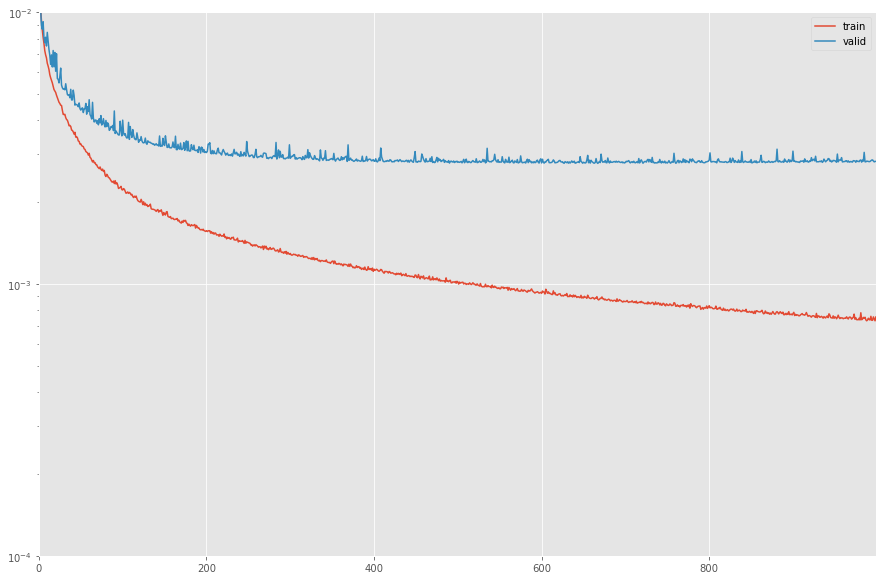

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

pd.DataFrame(hist.history).rename(columns={
    'loss':'train',
    'val_loss':'valid',
}).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

# TrainingErrorに対してValidationErrorが大きいので過学習していることがわかる
# 学習は指数関数的に進むので片対数グラフ（縦軸だけ対数）にすると見やすくなる（直線的になりやすいため）

ImageId    1783
Image      1783
dtype: int64


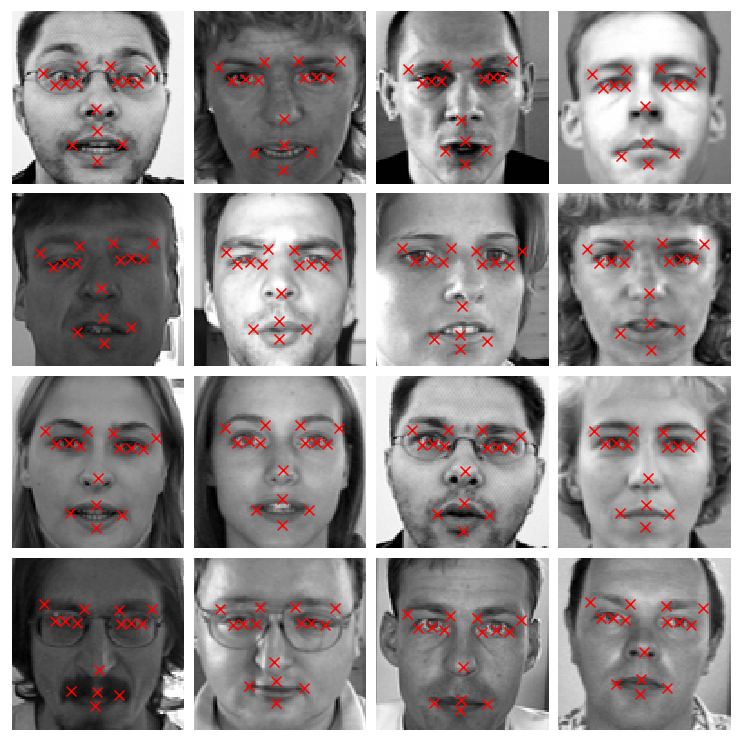

In [7]:
"""学習済みのモデルを使ってkeypointsを出力してみる
"""

def plot_sample(X, y, axis):
  img = X.reshape(96, 96)
  axis.imshow(img, cmap='gray')
  axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=100, c='red')

X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)

for i in range(16):
  plot_sample(X_test[i], 
              y_test[i],
              fig.add_subplot(4, 4, i+1, xticks=[], yticks=[]))
  
plt.show()

In [8]:
"""モデルの保存
pickleはkerasでは非推奨
"""

# model_dir = '/content/datalab/tmp/keypoints'
model_dir = './models/'
!mkdir -p $model_dir

open('{}/model1_architecture.json'.format(model_dir), 'w').write(model.to_json())
model.save_weights('{}/model1_weights.h5'.format(model_dir))

## モデル2: CNN

In [9]:
def load2d(test=False, cols=None):
  """画像ベクトルを(1,96,96)に変換する
  最後の1はチャネル数、gray scaleなので1
  """
  
  X, y = load(test, cols)
#   X = X.reshape(-1, 1, 96, 96)
  X = X.reshape(-1, 96, 96, 1)
  return X, y


from keras.layers import Conv2D, MaxPooling2D, Flatten

X, y = load2d()

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(30))
model2.summary() # なくてもよい

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error', optimizer=sgd)
hist2 = model2.fit(X, y, epochs=1000, validation_split=0.2)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

1712/1712 [==============================] - 1s - loss: 0.0036 - val_loss: 0.0038
Epoch 51/1000
1712/1712 [==============================] - 1s - loss: 0.0036 - val_loss: 0.0038
Epoch 52/1000
1712/1712 [==============================] - 1s - loss: 0.0036 - val_loss: 0.0038
Epoch 53/1000
1712/1712 [==============================] - 1s - loss: 0.0036 - val_loss: 0.0038
Epoch 54/1000
1712/1712 [==============================] - 1s - loss: 0.0035 - val_loss: 0.0037
Epoch 55/1000
1712/1712 [==============================] - 1s - loss: 0.0035 - val_loss: 0.0037
Epoch 56/1000
1712/1712 [==============================] - 1s - loss: 0.0035 - val_loss: 0.0037
Epoch 57/1000
1712/1712 [==============================] - 1s - loss: 0.0035 - val_loss: 0.0037
Epoch 58/1000
1712/1712 [==============================] - 1s - loss: 0.0034 - val_loss: 0.0037
Epoch 59/1000
1712/1712 [==============================] - 1s - loss: 0.0034 - val_loss: 0.0037
Epoch 60/1000
1712/1712 [=============================

1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0023
Epoch 136/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0023
Epoch 137/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0023
Epoch 138/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0023
Epoch 139/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0023
Epoch 140/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0022
Epoch 141/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0022
Epoch 142/1000
1712/1712 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0022
Epoch 143/1000
1712/1712 [==============================] - 1s - loss: 0.0018 - val_loss: 0.0022
Epoch 144/1000
1712/1712 [==============================] - 1s - loss: 0.0018 - val_loss: 0.0022
Epoch 145/1000
1712/1712 [===================

1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 220/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 221/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 222/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 223/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 224/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 225/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 226/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 227/1000
1712/1712 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0018
Epoch 228/1000
1712/1712 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 229/1000
1712/1712 [===================

1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 304/1000
1712/1712 [==============================] - 2s - loss: 0.0011 - val_loss: 0.0017
Epoch 305/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 306/1000
1712/1712 [==============================] - 2s - loss: 0.0011 - val_loss: 0.0017
Epoch 307/1000
1712/1712 [==============================] - 2s - loss: 0.0011 - val_loss: 0.0017
Epoch 308/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 309/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 310/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 311/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 312/1000
1712/1712 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 313/1000
1712/1712 [===================

1712/1712 [==============================] - 1s - loss: 9.3855e-04 - val_loss: 0.0016
Epoch 387/1000
1712/1712 [==============================] - 1s - loss: 9.3634e-04 - val_loss: 0.0016
Epoch 388/1000
1712/1712 [==============================] - 1s - loss: 9.3587e-04 - val_loss: 0.0016
Epoch 389/1000
1712/1712 [==============================] - 1s - loss: 9.3256e-04 - val_loss: 0.0016
Epoch 390/1000
1712/1712 [==============================] - 1s - loss: 9.3045e-04 - val_loss: 0.0016
Epoch 391/1000
1712/1712 [==============================] - 1s - loss: 9.2748e-04 - val_loss: 0.0016
Epoch 392/1000
1712/1712 [==============================] - 1s - loss: 9.2804e-04 - val_loss: 0.0016
Epoch 393/1000
1712/1712 [==============================] - 1s - loss: 9.2526e-04 - val_loss: 0.0016
Epoch 394/1000
1712/1712 [==============================] - 1s - loss: 9.2179e-04 - val_loss: 0.0016
Epoch 395/1000
1712/1712 [==============================] - 1s - loss: 9.2246e-04 - val_loss: 0.0016
Epoch

1712/1712 [==============================] - 1s - loss: 8.0717e-04 - val_loss: 0.0015
Epoch 468/1000
1712/1712 [==============================] - 1s - loss: 8.0553e-04 - val_loss: 0.0015
Epoch 469/1000
1712/1712 [==============================] - 1s - loss: 8.0498e-04 - val_loss: 0.0016
Epoch 470/1000
1712/1712 [==============================] - 1s - loss: 8.0310e-04 - val_loss: 0.0016
Epoch 471/1000
1712/1712 [==============================] - 1s - loss: 8.0237e-04 - val_loss: 0.0015
Epoch 472/1000
1712/1712 [==============================] - 1s - loss: 7.9932e-04 - val_loss: 0.0015
Epoch 473/1000
1712/1712 [==============================] - 1s - loss: 7.9733e-04 - val_loss: 0.0015
Epoch 474/1000
1712/1712 [==============================] - 1s - loss: 7.9810e-04 - val_loss: 0.0015
Epoch 475/1000
1712/1712 [==============================] - 1s - loss: 7.9458e-04 - val_loss: 0.0016
Epoch 476/1000
1712/1712 [==============================] - 1s - loss: 7.9692e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 7.0477e-04 - val_loss: 0.0015
Epoch 549/1000
1712/1712 [==============================] - 1s - loss: 7.0459e-04 - val_loss: 0.0015
Epoch 550/1000
1712/1712 [==============================] - 1s - loss: 7.0466e-04 - val_loss: 0.0015
Epoch 551/1000
1712/1712 [==============================] - 1s - loss: 7.0276e-04 - val_loss: 0.0015
Epoch 552/1000
1712/1712 [==============================] - 1s - loss: 7.0148e-04 - val_loss: 0.0015
Epoch 553/1000
1712/1712 [==============================] - 1s - loss: 7.0023e-04 - val_loss: 0.0015
Epoch 554/1000
1712/1712 [==============================] - 1s - loss: 6.9938e-04 - val_loss: 0.0015
Epoch 555/1000
1712/1712 [==============================] - 1s - loss: 6.9755e-04 - val_loss: 0.0015
Epoch 556/1000
1712/1712 [==============================] - 1s - loss: 6.9618e-04 - val_loss: 0.0015
Epoch 557/1000
1712/1712 [==============================] - 1s - loss: 6.9584e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 6.2494e-04 - val_loss: 0.0015
Epoch 630/1000
1712/1712 [==============================] - 1s - loss: 6.2303e-04 - val_loss: 0.0015
Epoch 631/1000
1712/1712 [==============================] - 1s - loss: 6.2159e-04 - val_loss: 0.0015
Epoch 632/1000
1712/1712 [==============================] - 1s - loss: 6.2066e-04 - val_loss: 0.0015
Epoch 633/1000
1712/1712 [==============================] - 1s - loss: 6.2045e-04 - val_loss: 0.0015
Epoch 634/1000
1712/1712 [==============================] - 1s - loss: 6.1838e-04 - val_loss: 0.0015
Epoch 635/1000
1712/1712 [==============================] - 1s - loss: 6.1643e-04 - val_loss: 0.0015
Epoch 636/1000
1712/1712 [==============================] - 1s - loss: 6.1824e-04 - val_loss: 0.0015
Epoch 637/1000
1712/1712 [==============================] - 1s - loss: 6.1799e-04 - val_loss: 0.0015
Epoch 638/1000
1712/1712 [==============================] - 1s - loss: 6.1557e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 5.5423e-04 - val_loss: 0.0015
Epoch 711/1000
1712/1712 [==============================] - 1s - loss: 5.5520e-04 - val_loss: 0.0015
Epoch 712/1000
1712/1712 [==============================] - 1s - loss: 5.5638e-04 - val_loss: 0.0015
Epoch 713/1000
1712/1712 [==============================] - 1s - loss: 5.5504e-04 - val_loss: 0.0015
Epoch 714/1000
1712/1712 [==============================] - 1s - loss: 5.5359e-04 - val_loss: 0.0015
Epoch 715/1000
1712/1712 [==============================] - 1s - loss: 5.5061e-04 - val_loss: 0.0015
Epoch 716/1000
1712/1712 [==============================] - 1s - loss: 5.5210e-04 - val_loss: 0.0015
Epoch 717/1000
1712/1712 [==============================] - 1s - loss: 5.5147e-04 - val_loss: 0.0015
Epoch 718/1000
1712/1712 [==============================] - 1s - loss: 5.5020e-04 - val_loss: 0.0015
Epoch 719/1000
1712/1712 [==============================] - 1s - loss: 5.4870e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 4.9848e-04 - val_loss: 0.0015
Epoch 792/1000
1712/1712 [==============================] - 1s - loss: 5.0038e-04 - val_loss: 0.0015
Epoch 793/1000
1712/1712 [==============================] - 1s - loss: 4.9882e-04 - val_loss: 0.0015
Epoch 794/1000
1712/1712 [==============================] - 1s - loss: 4.9684e-04 - val_loss: 0.0015
Epoch 795/1000
1712/1712 [==============================] - 1s - loss: 4.9745e-04 - val_loss: 0.0015
Epoch 796/1000
1712/1712 [==============================] - 1s - loss: 4.9696e-04 - val_loss: 0.0015
Epoch 797/1000
1712/1712 [==============================] - 1s - loss: 4.9427e-04 - val_loss: 0.0015
Epoch 798/1000
1712/1712 [==============================] - 1s - loss: 4.9469e-04 - val_loss: 0.0015
Epoch 799/1000
1712/1712 [==============================] - 1s - loss: 4.9546e-04 - val_loss: 0.0015
Epoch 800/1000
1712/1712 [==============================] - 1s - loss: 4.9498e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 4.5150e-04 - val_loss: 0.0015
Epoch 873/1000
1712/1712 [==============================] - 1s - loss: 4.5164e-04 - val_loss: 0.0015
Epoch 874/1000
1712/1712 [==============================] - 1s - loss: 4.4981e-04 - val_loss: 0.0015
Epoch 875/1000
1712/1712 [==============================] - 2s - loss: 4.5095e-04 - val_loss: 0.0015
Epoch 876/1000
1712/1712 [==============================] - 1s - loss: 4.5071e-04 - val_loss: 0.0015
Epoch 877/1000
1712/1712 [==============================] - 1s - loss: 4.4828e-04 - val_loss: 0.0015
Epoch 878/1000
1712/1712 [==============================] - 1s - loss: 4.4875e-04 - val_loss: 0.0015
Epoch 879/1000
1712/1712 [==============================] - 1s - loss: 4.4688e-04 - val_loss: 0.0015
Epoch 880/1000
1712/1712 [==============================] - 1s - loss: 4.4793e-04 - val_loss: 0.0015
Epoch 881/1000
1712/1712 [==============================] - 1s - loss: 4.4638e-04 - val_loss: 0.0015
Epoch

1712/1712 [==============================] - 1s - loss: 4.0922e-04 - val_loss: 0.0015
Epoch 954/1000
1712/1712 [==============================] - 1s - loss: 4.0975e-04 - val_loss: 0.0015
Epoch 955/1000
1712/1712 [==============================] - 1s - loss: 4.0995e-04 - val_loss: 0.0015
Epoch 956/1000
1712/1712 [==============================] - 1s - loss: 4.0836e-04 - val_loss: 0.0015
Epoch 957/1000
1712/1712 [==============================] - 1s - loss: 4.0810e-04 - val_loss: 0.0015
Epoch 958/1000
1712/1712 [==============================] - 1s - loss: 4.0725e-04 - val_loss: 0.0015
Epoch 959/1000
1712/1712 [==============================] - 1s - loss: 4.0748e-04 - val_loss: 0.0015
Epoch 960/1000
1712/1712 [==============================] - 1s - loss: 4.0684e-04 - val_loss: 0.0015
Epoch 961/1000
1712/1712 [==============================] - 1s - loss: 4.0556e-04 - val_loss: 0.0015
Epoch 962/1000
1712/1712 [==============================] - 1s - loss: 4.0672e-04 - val_loss: 0.0015
Epoch

In [10]:
"""モデルの保存
"""

model_dir = './models/'
!mkdir -p $model_dir

open('{}/model2_architecture.json'.format(model_dir), 'w').write(model2.to_json())
model2.save_weights('{}/model2_weights.h5'.format(model_dir))

In [11]:
"""モデルの読込
"""

from keras.models import model_from_json
model2 = model_from_json(open('{}/model2_architecture.json'.format(model_dir)).read())
model2.load_weights('{}/model2_weights.h5'.format(model_dir))

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model2, show_shapes=True, to_file="./models/model2.png")

from PIL import Image
Image.open("./models/model2.png")

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

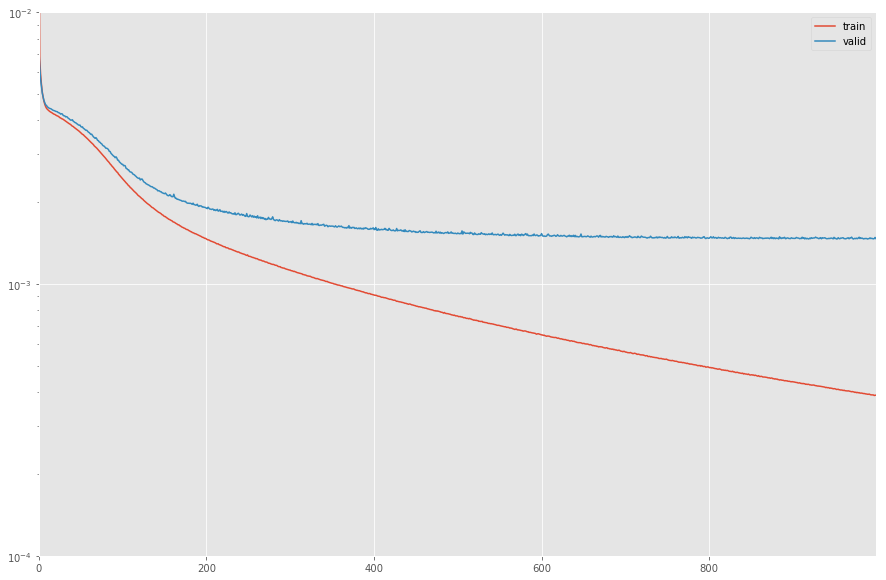

In [13]:
"""学習曲線
"""

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

pd.DataFrame(hist2.history).rename(columns={
    'loss':'train',
    'val_loss':'valid',
}).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

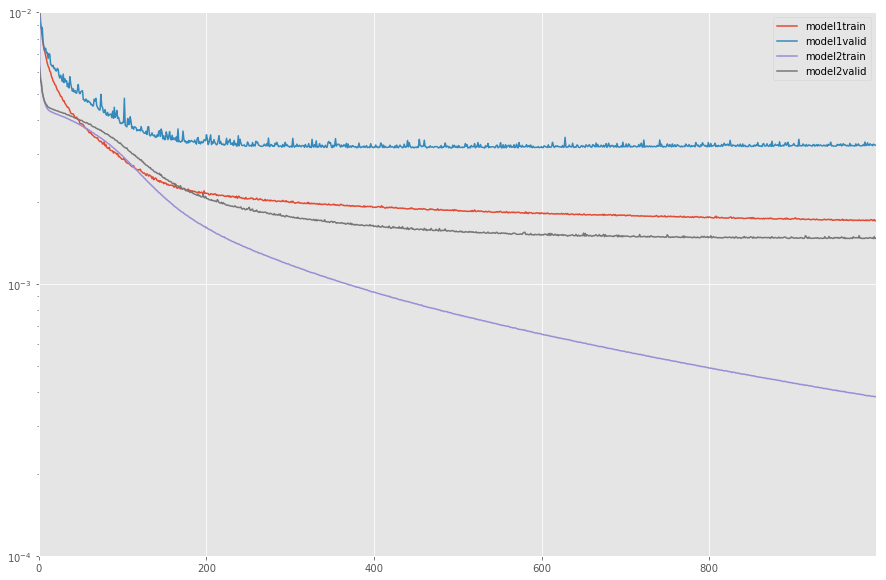

In [46]:
"""model1（ニューラルネットワーク）とmodel2（CNN）の比較
model2の方がエラー率が下がっていることがわかる
validだけエラー率が下がっているのは過学習が進んでいってしまっているから
"""

pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


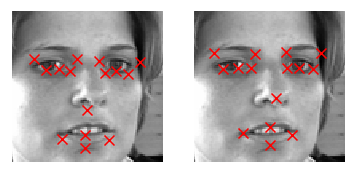

In [14]:
"""model1, model2の予測結果の比較
model2の方が正しくkeypointをplotできていることがわかる
"""

sample1 = load(test=True)[0][6:7]
sample2 = load2d(test=True)[0][6:7]
y_pred1 = model.predict(sample1)[0]
y_pred2 = model2.predict(sample2)[0]

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(sample1, y_pred1, ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(sample2, y_pred2, ax)
plt.show()

# Data Augmentation
- 過学習を防ぐために学習データを増やす
- データが限られているので反転や回転することでカサ増しさせる

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

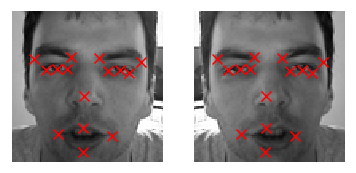

In [20]:
X, y = load2d()
X_flipped = X[:, :, ::-1, :]

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(X[1], y[1], ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(X_flipped[1], y[1], ax)
plt.show()

In [26]:
X.shape

(2140, 96, 96, 1)

In [21]:
"""keypoint（正解ラベル）も反転させる必要がある
"""

# nose_tip_yとかは反転いらないので反転させるカラムを選択
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
]

df = read_csv(expanduser(FTRAIN))
for i, j in flip_indices:
    print("{} -> {}".format(df.columns[i], df.columns[j]))

left_eye_center_x -> right_eye_center_x
left_eye_center_y -> right_eye_center_y
left_eye_inner_corner_x -> right_eye_inner_corner_x
left_eye_inner_corner_y -> right_eye_inner_corner_y
left_eye_outer_corner_x -> right_eye_outer_corner_x
left_eye_outer_corner_y -> right_eye_outer_corner_y
left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
mouth_left_corner_x -> mouth_right_corner_x
mouth_left_corner_y -> mouth_right_corner_y


In [27]:
"""kerasでの実装
反転だけならImageDataGeneratorのholizontal_flip=Trueで一発だが、
Xだけでなくyも適切に反転させる必要があるのでImageDataGeneratorを継承してnext()をカスタマイズ
"""
from keras.preprocessing.image import ImageDataGenerator

class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
    ]

    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        
        # 全イテレートで反転させるのではなく50%の確率にすることでメモリの消費量削減
        indices = np.random.choice(batch_size, batch_size/2, replace=False)
        X_batch[indices] = X_batch[indices, :, ::-1, :]
        
        if y_batch:
            # x座標をフリップ
            y_batch[indices, ::2] = y_batch[indices, ::2] * -1
            
            # left_eye_center_x -> right_eye_center_x のようにフリップ
            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
                
        return X_batch, y_batch

In [29]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X, y = load2d()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (2, 2)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(500))
model3.add(Activation('relu'))
model3.add(Dense(500))
model3.add(Activation('relu'))
model3.add(Dense(30))

model3.summary()

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

# 途中から学習する場合はコメントアウトを外す
# model3 = model_from_json(open('{}/model3_architecture.json'.format(model_dir)).read())
# model3.load_weights('{}/model3_weights.h5'.format(model_dir))

model3.compile(loss='mean_squared_error', optimizer=sgd)
flipgen = FlippedImageDataGenerator()

# Generatorを使う場合はfitではなくfit_generatorを使う
# fit_generatorはvalidation_splitが使えないので自前でtest_splitしてvalidation_dataに渡す
hist3 = model3.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             epochs=3000,
                             validation_data=(X_val, y_val))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=53, epochs=3000)`


Epoch 1/3000
53/53 [==============================] - 2s - loss: 0.0342 - val_loss: 0.0067
Epoch 2/3000
53/53 [==============================] - 1s - loss: 0.0064 - val_loss: 0.0056
Epoch 3/3000
53/53 [==============================] - 1s - loss: 0.0056 - val_loss: 0.0051
Epoch 4/3000
53/53 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0048
Epoch 5/3000
53/53 [==============================] - 1s - loss: 0.0050 - val_loss: 0.0046
Epoch 6/3000
53/53 [==============================] - 1s - loss: 0.0047 - val_loss: 0.0045
Epoch 7/3000
53/53 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0045
Epoch 8/3000
53/53 [==============================] - 1s - loss: 0.0046 - val_loss: 0.0044
Epoch 9/3000
53/53 [==============================] - 1s - loss: 0.0044 - val_loss: 0.0044
Epoch 10/3000
53/53 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0043
Epoch 11/3000
53/53 [==============================] - 1s - loss: 0.0044 - val_loss: 0.00

53/53 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0027
Epoch 91/3000
53/53 [==============================] - 1s - loss: 0.0026 - val_loss: 0.0027
Epoch 92/3000
53/53 [==============================] - 1s - loss: 0.0026 - val_loss: 0.0027
Epoch 93/3000
53/53 [==============================] - 1s - loss: 0.0024 - val_loss: 0.0027
Epoch 94/3000
53/53 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0027
Epoch 95/3000
53/53 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 96/3000
53/53 [==============================] - 1s - loss: 0.0024 - val_loss: 0.0026
Epoch 97/3000
53/53 [==============================] - 1s - loss: 0.0023 - val_loss: 0.0026
Epoch 98/3000
53/53 [==============================] - 1s - loss: 0.0024 - val_loss: 0.0026
Epoch 99/3000
53/53 [==============================] - 1s - loss: 0.0023 - val_loss: 0.0026
Epoch 100/3000
53/53 [==============================] - 1s - loss: 0.0024 - val_loss: 0.0025
E

53/53 [==============================] - ETA: 0s - loss: 0.001 - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 178/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 179/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0020
Epoch 180/3000
53/53 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 181/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 182/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 183/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 184/3000
53/53 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0019
Epoch 185/3000
53/53 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 186/3000
53/53 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0019
Epoch 187/3000
53/53 [==============================] - 1s - 

53/53 [==============================] - 1s - loss: 0.0012 - val_loss: 0.0017
Epoch 266/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 267/3000
53/53 [==============================] - 2s - loss: 0.0011 - val_loss: 0.0017
Epoch 268/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 269/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 270/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 271/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 272/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 273/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 274/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0017
Epoch 275/3000
53/53 [==============================] - 1s - loss: 0.0011 - val_loss:

53/53 [==============================] - 1s - loss: 9.3719e-04 - val_loss: 0.0016
Epoch 352/3000
53/53 [==============================] - 1s - loss: 9.7376e-04 - val_loss: 0.0016
Epoch 353/3000
53/53 [==============================] - 1s - loss: 9.3860e-04 - val_loss: 0.0016
Epoch 354/3000
53/53 [==============================] - 1s - loss: 9.2263e-04 - val_loss: 0.0016
Epoch 355/3000
53/53 [==============================] - 1s - loss: 9.5204e-04 - val_loss: 0.0016
Epoch 356/3000
53/53 [==============================] - 1s - loss: 9.3222e-04 - val_loss: 0.0016
Epoch 357/3000
53/53 [==============================] - 1s - loss: 9.3875e-04 - val_loss: 0.0016
Epoch 358/3000
53/53 [==============================] - 1s - loss: 9.3397e-04 - val_loss: 0.0016
Epoch 359/3000
53/53 [==============================] - 1s - loss: 9.2435e-04 - val_loss: 0.0016
Epoch 360/3000
53/53 [==============================] - 2s - loss: 9.4730e-04 - val_loss: 0.0016
Epoch 361/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 8.1348e-04 - val_loss: 0.0016
Epoch 436/3000
53/53 [==============================] - 1s - loss: 8.1087e-04 - val_loss: 0.0016
Epoch 437/3000
53/53 [==============================] - 1s - loss: 8.2095e-04 - val_loss: 0.0016
Epoch 438/3000
53/53 [==============================] - 1s - loss: 7.9902e-04 - val_loss: 0.0016
Epoch 439/3000
53/53 [==============================] - 1s - loss: 8.0681e-04 - val_loss: 0.0016
Epoch 440/3000
53/53 [==============================] - 1s - loss: 8.1417e-04 - val_loss: 0.0016
Epoch 441/3000
53/53 [==============================] - 1s - loss: 8.0369e-04 - val_loss: 0.0016
Epoch 442/3000
53/53 [==============================] - 2s - loss: 7.9850e-04 - val_loss: 0.0016
Epoch 443/3000
53/53 [==============================] - 1s - loss: 8.1871e-04 - val_loss: 0.0016
Epoch 444/3000
53/53 [==============================] - 1s - loss: 7.9053e-04 - val_loss: 0.0016
Epoch 445/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 7.0759e-04 - val_loss: 0.0015
Epoch 520/3000
53/53 [==============================] - 1s - loss: 7.1745e-04 - val_loss: 0.0016
Epoch 521/3000
53/53 [==============================] - 1s - loss: 7.0967e-04 - val_loss: 0.0016
Epoch 522/3000
53/53 [==============================] - 1s - loss: 7.0584e-04 - val_loss: 0.0015
Epoch 523/3000
53/53 [==============================] - 1s - loss: 7.1224e-04 - val_loss: 0.0015
Epoch 524/3000
53/53 [==============================] - 1s - loss: 6.9836e-04 - val_loss: 0.0015
Epoch 525/3000
53/53 [==============================] - 1s - loss: 7.2063e-04 - val_loss: 0.0015
Epoch 526/3000
53/53 [==============================] - 1s - loss: 6.9754e-04 - val_loss: 0.0015
Epoch 527/3000
53/53 [==============================] - 1s - loss: 7.3137e-04 - val_loss: 0.0015
Epoch 528/3000
53/53 [==============================] - 1s - loss: 6.8771e-04 - val_loss: 0.0015
Epoch 529/3000
53/53 [=======================

53/53 [==============================] - 2s - loss: 6.4697e-04 - val_loss: 0.0015
Epoch 604/3000
53/53 [==============================] - 1s - loss: 6.2430e-04 - val_loss: 0.0015
Epoch 605/3000
53/53 [==============================] - 1s - loss: 6.2550e-04 - val_loss: 0.0015
Epoch 606/3000
53/53 [==============================] - 1s - loss: 6.4111e-04 - val_loss: 0.0015
Epoch 607/3000
53/53 [==============================] - 1s - loss: 6.2303e-04 - val_loss: 0.0015
Epoch 608/3000
53/53 [==============================] - 1s - loss: 6.2915e-04 - val_loss: 0.0015
Epoch 609/3000
53/53 [==============================] - 1s - loss: 6.1888e-04 - val_loss: 0.0015
Epoch 610/3000
53/53 [==============================] - 1s - loss: 6.3876e-04 - val_loss: 0.0015
Epoch 611/3000
53/53 [==============================] - 1s - loss: 6.2879e-04 - val_loss: 0.0015
Epoch 612/3000
53/53 [==============================] - 1s - loss: 6.1562e-04 - val_loss: 0.0015
Epoch 613/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 5.7186e-04 - val_loss: 0.0015
Epoch 688/3000
53/53 [==============================] - 1s - loss: 5.6464e-04 - val_loss: 0.0015
Epoch 689/3000
53/53 [==============================] - 1s - loss: 5.6973e-04 - val_loss: 0.0015
Epoch 690/3000
53/53 [==============================] - 1s - loss: 5.7118e-04 - val_loss: 0.0015
Epoch 691/3000
53/53 [==============================] - 1s - loss: 5.5859e-04 - val_loss: 0.0015
Epoch 692/3000
53/53 [==============================] - 1s - loss: 5.5663e-04 - val_loss: 0.0015
Epoch 693/3000
53/53 [==============================] - 1s - loss: 5.5612e-04 - val_loss: 0.0015
Epoch 694/3000
53/53 [==============================] - 1s - loss: 5.6610e-04 - val_loss: 0.0015
Epoch 695/3000
53/53 [==============================] - 1s - loss: 5.6745e-04 - val_loss: 0.0015
Epoch 696/3000
53/53 [==============================] - 1s - loss: 5.5006e-04 - val_loss: 0.0015
Epoch 697/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 5.0090e-04 - val_loss: 0.0015
Epoch 772/3000
53/53 [==============================] - 1s - loss: 5.1479e-04 - val_loss: 0.0015
Epoch 773/3000
53/53 [==============================] - 1s - loss: 5.1324e-04 - val_loss: 0.0015
Epoch 774/3000
53/53 [==============================] - 1s - loss: 5.1594e-04 - val_loss: 0.0015
Epoch 775/3000
53/53 [==============================] - 1s - loss: 5.0613e-04 - val_loss: 0.0015
Epoch 776/3000
53/53 [==============================] - 1s - loss: 4.9659e-04 - val_loss: 0.0015
Epoch 777/3000
53/53 [==============================] - 1s - loss: 5.1176e-04 - val_loss: 0.0015
Epoch 778/3000
53/53 [==============================] - 1s - loss: 5.0173e-04 - val_loss: 0.0015
Epoch 779/3000
53/53 [==============================] - 1s - loss: 5.0527e-04 - val_loss: 0.0015
Epoch 780/3000
53/53 [==============================] - 1s - loss: 5.1047e-04 - val_loss: 0.0015
Epoch 781/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 4.6583e-04 - val_loss: 0.0015
Epoch 856/3000
53/53 [==============================] - 1s - loss: 4.5645e-04 - val_loss: 0.0015
Epoch 857/3000
53/53 [==============================] - 1s - loss: 4.6040e-04 - val_loss: 0.0015
Epoch 858/3000
53/53 [==============================] - 1s - loss: 4.6567e-04 - val_loss: 0.0015
Epoch 859/3000
53/53 [==============================] - 1s - loss: 4.5690e-04 - val_loss: 0.0015
Epoch 860/3000
53/53 [==============================] - 1s - loss: 4.5890e-04 - val_loss: 0.0015
Epoch 861/3000
53/53 [==============================] - 1s - loss: 4.6139e-04 - val_loss: 0.0015
Epoch 862/3000
53/53 [==============================] - 1s - loss: 4.5635e-04 - val_loss: 0.0015
Epoch 863/3000
53/53 [==============================] - 1s - loss: 4.5794e-04 - val_loss: 0.0015
Epoch 864/3000
53/53 [==============================] - 1s - loss: 4.5674e-04 - val_loss: 0.0015
Epoch 865/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 4.0632e-04 - val_loss: 0.0015
Epoch 940/3000
53/53 [==============================] - 1s - loss: 4.2709e-04 - val_loss: 0.0015
Epoch 941/3000
53/53 [==============================] - 1s - loss: 4.2054e-04 - val_loss: 0.0015
Epoch 942/3000
53/53 [==============================] - 1s - loss: 4.1920e-04 - val_loss: 0.0015
Epoch 943/3000
53/53 [==============================] - 1s - loss: 4.2163e-04 - val_loss: 0.0015
Epoch 944/3000
53/53 [==============================] - 1s - loss: 4.1495e-04 - val_loss: 0.0015
Epoch 945/3000
53/53 [==============================] - 1s - loss: 4.1078e-04 - val_loss: 0.0015
Epoch 946/3000
53/53 [==============================] - 1s - loss: 4.2669e-04 - val_loss: 0.0015
Epoch 947/3000
53/53 [==============================] - 1s - loss: 4.1121e-04 - val_loss: 0.0015
Epoch 948/3000
53/53 [==============================] - 1s - loss: 4.2358e-04 - val_loss: 0.0015
Epoch 949/3000
53/53 [=======================

53/53 [==============================] - 1s - loss: 3.9208e-04 - val_loss: 0.0015
Epoch 1023/3000
53/53 [==============================] - 1s - loss: 3.7532e-04 - val_loss: 0.0015
Epoch 1024/3000
53/53 [==============================] - 1s - loss: 3.8520e-04 - val_loss: 0.0015
Epoch 1025/3000
53/53 [==============================] - 1s - loss: 3.8602e-04 - val_loss: 0.0015
Epoch 1026/3000
53/53 [==============================] - 1s - loss: 3.8290e-04 - val_loss: 0.0015
Epoch 1027/3000
53/53 [==============================] - 1s - loss: 3.8368e-04 - val_loss: 0.0015
Epoch 1028/3000
53/53 [==============================] - 1s - loss: 3.8272e-04 - val_loss: 0.0015
Epoch 1029/3000
53/53 [==============================] - 1s - loss: 3.8333e-04 - val_loss: 0.0015
Epoch 1030/3000
53/53 [==============================] - 1s - loss: 3.8322e-04 - val_loss: 0.0015
Epoch 1031/3000
53/53 [==============================] - 1s - loss: 3.7810e-04 - val_loss: 0.0015
Epoch 1032/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 3.5268e-04 - val_loss: 0.0015
Epoch 1106/3000
53/53 [==============================] - 1s - loss: 3.5417e-04 - val_loss: 0.0015
Epoch 1107/3000
53/53 [==============================] - 1s - loss: 3.5205e-04 - val_loss: 0.0015
Epoch 1108/3000
53/53 [==============================] - 1s - loss: 3.5517e-04 - val_loss: 0.0015
Epoch 1109/3000
53/53 [==============================] - 1s - loss: 3.5352e-04 - val_loss: 0.0015
Epoch 1110/3000
53/53 [==============================] - 1s - loss: 3.5225e-04 - val_loss: 0.0015
Epoch 1111/3000
53/53 [==============================] - 1s - loss: 3.5273e-04 - val_loss: 0.0015
Epoch 1112/3000
53/53 [==============================] - 1s - loss: 3.5153e-04 - val_loss: 0.0015
Epoch 1113/3000
53/53 [==============================] - 1s - loss: 3.4914e-04 - val_loss: 0.0015
Epoch 1114/3000
53/53 [==============================] - 1s - loss: 3.5615e-04 - val_loss: 0.0015
Epoch 1115/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 3.2876e-04 - val_loss: 0.0015
Epoch 1189/3000
53/53 [==============================] - 1s - loss: 3.2487e-04 - val_loss: 0.0015
Epoch 1190/3000
53/53 [==============================] - 1s - loss: 3.2776e-04 - val_loss: 0.0015
Epoch 1191/3000
53/53 [==============================] - 1s - loss: 3.2656e-04 - val_loss: 0.0015
Epoch 1192/3000
53/53 [==============================] - 1s - loss: 3.2572e-04 - val_loss: 0.0015
Epoch 1193/3000
53/53 [==============================] - 1s - loss: 3.2209e-04 - val_loss: 0.0015
Epoch 1194/3000
53/53 [==============================] - 1s - loss: 3.2071e-04 - val_loss: 0.0015
Epoch 1195/3000
53/53 [==============================] - 1s - loss: 3.2687e-04 - val_loss: 0.0015
Epoch 1196/3000
53/53 [==============================] - 1s - loss: 3.2119e-04 - val_loss: 0.0015
Epoch 1197/3000
53/53 [==============================] - 1s - loss: 3.2892e-04 - val_loss: 0.0015
Epoch 1198/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 3.0873e-04 - val_loss: 0.0015
Epoch 1272/3000
53/53 [==============================] - 1s - loss: 2.9863e-04 - val_loss: 0.0015
Epoch 1273/3000
53/53 [==============================] - 1s - loss: 3.0171e-04 - val_loss: 0.0015
Epoch 1274/3000
53/53 [==============================] - 1s - loss: 2.9330e-04 - val_loss: 0.0015
Epoch 1275/3000
53/53 [==============================] - 1s - loss: 3.0404e-04 - val_loss: 0.0015
Epoch 1276/3000
53/53 [==============================] - 1s - loss: 3.0864e-04 - val_loss: 0.0015
Epoch 1277/3000
53/53 [==============================] - 1s - loss: 2.9490e-04 - val_loss: 0.0015
Epoch 1278/3000
53/53 [==============================] - 2s - loss: 2.9470e-04 - val_loss: 0.0015
Epoch 1279/3000
53/53 [==============================] - 1s - loss: 3.0273e-04 - val_loss: 0.0015
Epoch 1280/3000
53/53 [==============================] - 1s - loss: 2.9639e-04 - val_loss: 0.0015
Epoch 1281/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 2.7971e-04 - val_loss: 0.0015
Epoch 1355/3000
53/53 [==============================] - 1s - loss: 2.7590e-04 - val_loss: 0.0015
Epoch 1356/3000
53/53 [==============================] - 1s - loss: 2.8167e-04 - val_loss: 0.0015
Epoch 1357/3000
53/53 [==============================] - 1s - loss: 2.7945e-04 - val_loss: 0.0015
Epoch 1358/3000
53/53 [==============================] - 1s - loss: 2.7928e-04 - val_loss: 0.0015
Epoch 1359/3000
53/53 [==============================] - 1s - loss: 2.7696e-04 - val_loss: 0.0015
Epoch 1360/3000
53/53 [==============================] - 1s - loss: 2.7629e-04 - val_loss: 0.0015
Epoch 1361/3000
53/53 [==============================] - 1s - loss: 2.8549e-04 - val_loss: 0.0015
Epoch 1362/3000
53/53 [==============================] - 1s - loss: 2.7309e-04 - val_loss: 0.0015
Epoch 1363/3000
53/53 [==============================] - 1s - loss: 2.7988e-04 - val_loss: 0.0015
Epoch 1364/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 2.6024e-04 - val_loss: 0.0015
Epoch 1438/3000
53/53 [==============================] - 1s - loss: 2.6452e-04 - val_loss: 0.0015
Epoch 1439/3000
53/53 [==============================] - 1s - loss: 2.5653e-04 - val_loss: 0.0015
Epoch 1440/3000
53/53 [==============================] - 1s - loss: 2.5722e-04 - val_loss: 0.0015
Epoch 1441/3000
53/53 [==============================] - 1s - loss: 2.6300e-04 - val_loss: 0.0015
Epoch 1442/3000
53/53 [==============================] - 1s - loss: 2.5517e-04 - val_loss: 0.0015
Epoch 1443/3000
53/53 [==============================] - 1s - loss: 2.5906e-04 - val_loss: 0.0015
Epoch 1444/3000
53/53 [==============================] - 1s - loss: 2.5555e-04 - val_loss: 0.0015
Epoch 1445/3000
53/53 [==============================] - 1s - loss: 2.6135e-04 - val_loss: 0.0015
Epoch 1446/3000
53/53 [==============================] - 1s - loss: 2.5398e-04 - val_loss: 0.0015
Epoch 1447/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 2.3686e-04 - val_loss: 0.0015
Epoch 1521/3000
53/53 [==============================] - 1s - loss: 2.4704e-04 - val_loss: 0.0015
Epoch 1522/3000
53/53 [==============================] - 1s - loss: 2.3965e-04 - val_loss: 0.0015
Epoch 1523/3000
53/53 [==============================] - 1s - loss: 2.3985e-04 - val_loss: 0.0015
Epoch 1524/3000
53/53 [==============================] - 1s - loss: 2.4295e-04 - val_loss: 0.0015
Epoch 1525/3000
53/53 [==============================] - 1s - loss: 2.4454e-04 - val_loss: 0.0015
Epoch 1526/3000
53/53 [==============================] - 1s - loss: 2.3841e-04 - val_loss: 0.0015
Epoch 1527/3000
53/53 [==============================] - 1s - loss: 2.4280e-04 - val_loss: 0.0015
Epoch 1528/3000
53/53 [==============================] - 1s - loss: 2.4147e-04 - val_loss: 0.0015
Epoch 1529/3000
53/53 [==============================] - 1s - loss: 2.3713e-04 - val_loss: 0.0015
Epoch 1530/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 2.2441e-04 - val_loss: 0.0015
Epoch 1604/3000
53/53 [==============================] - 1s - loss: 2.2695e-04 - val_loss: 0.0015
Epoch 1605/3000
53/53 [==============================] - 1s - loss: 2.2488e-04 - val_loss: 0.0015
Epoch 1606/3000
53/53 [==============================] - 1s - loss: 2.2523e-04 - val_loss: 0.0015
Epoch 1607/3000
53/53 [==============================] - 1s - loss: 2.2638e-04 - val_loss: 0.0015
Epoch 1608/3000
53/53 [==============================] - 1s - loss: 2.2748e-04 - val_loss: 0.0015
Epoch 1609/3000
53/53 [==============================] - 1s - loss: 2.2108e-04 - val_loss: 0.0015
Epoch 1610/3000
53/53 [==============================] - 1s - loss: 2.2748e-04 - val_loss: 0.0015
Epoch 1611/3000
53/53 [==============================] - 1s - loss: 2.2281e-04 - val_loss: 0.0015
Epoch 1612/3000
53/53 [==============================] - 1s - loss: 2.2957e-04 - val_loss: 0.0015
Epoch 1613/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 2.1495e-04 - val_loss: 0.0015
Epoch 1687/3000
53/53 [==============================] - 1s - loss: 2.0844e-04 - val_loss: 0.0015
Epoch 1688/3000
53/53 [==============================] - 2s - loss: 2.1557e-04 - val_loss: 0.0015
Epoch 1689/3000
53/53 [==============================] - 1s - loss: 2.1173e-04 - val_loss: 0.0015
Epoch 1690/3000
53/53 [==============================] - 1s - loss: 2.0696e-04 - val_loss: 0.0015
Epoch 1691/3000
53/53 [==============================] - 1s - loss: 2.1109e-04 - val_loss: 0.0015
Epoch 1692/3000
53/53 [==============================] - 1s - loss: 2.1370e-04 - val_loss: 0.0015
Epoch 1693/3000
53/53 [==============================] - 1s - loss: 2.1050e-04 - val_loss: 0.0015
Epoch 1694/3000
53/53 [==============================] - 1s - loss: 2.0968e-04 - val_loss: 0.0015
Epoch 1695/3000
53/53 [==============================] - 1s - loss: 2.1082e-04 - val_loss: 0.0015
Epoch 1696/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.9961e-04 - val_loss: 0.0015
Epoch 1770/3000
53/53 [==============================] - 1s - loss: 1.9910e-04 - val_loss: 0.0015
Epoch 1771/3000
53/53 [==============================] - 1s - loss: 1.9721e-04 - val_loss: 0.0015
Epoch 1772/3000
53/53 [==============================] - 1s - loss: 1.9936e-04 - val_loss: 0.0015
Epoch 1773/3000
53/53 [==============================] - 1s - loss: 1.9826e-04 - val_loss: 0.0015
Epoch 1774/3000
53/53 [==============================] - 1s - loss: 1.9613e-04 - val_loss: 0.0015
Epoch 1775/3000
53/53 [==============================] - 1s - loss: 1.9760e-04 - val_loss: 0.0015
Epoch 1776/3000
53/53 [==============================] - 1s - loss: 1.9753e-04 - val_loss: 0.0015
Epoch 1777/3000
53/53 [==============================] - 1s - loss: 1.9810e-04 - val_loss: 0.0015
Epoch 1778/3000
53/53 [==============================] - 1s - loss: 1.9828e-04 - val_loss: 0.0015
Epoch 1779/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.8843e-04 - val_loss: 0.0015
Epoch 1853/3000
53/53 [==============================] - 1s - loss: 1.8442e-04 - val_loss: 0.0015
Epoch 1854/3000
53/53 [==============================] - 1s - loss: 1.9024e-04 - val_loss: 0.0015
Epoch 1855/3000
53/53 [==============================] - 1s - loss: 1.8753e-04 - val_loss: 0.0015
Epoch 1856/3000
53/53 [==============================] - 1s - loss: 1.8271e-04 - val_loss: 0.0015
Epoch 1857/3000
53/53 [==============================] - 1s - loss: 1.8956e-04 - val_loss: 0.0015
Epoch 1858/3000
53/53 [==============================] - 1s - loss: 1.8534e-04 - val_loss: 0.0015
Epoch 1859/3000
53/53 [==============================] - 1s - loss: 1.8174e-04 - val_loss: 0.0015
Epoch 1860/3000
53/53 [==============================] - 2s - loss: 1.8896e-04 - val_loss: 0.0015
Epoch 1861/3000
53/53 [==============================] - 2s - loss: 1.8565e-04 - val_loss: 0.0015
Epoch 1862/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.7546e-04 - val_loss: 0.0015
Epoch 1936/3000
53/53 [==============================] - 1s - loss: 1.7607e-04 - val_loss: 0.0015
Epoch 1937/3000
53/53 [==============================] - 1s - loss: 1.7535e-04 - val_loss: 0.0015
Epoch 1938/3000
53/53 [==============================] - 1s - loss: 1.7659e-04 - val_loss: 0.0015
Epoch 1939/3000
53/53 [==============================] - 1s - loss: 1.7630e-04 - val_loss: 0.0015
Epoch 1940/3000
53/53 [==============================] - 1s - loss: 1.7564e-04 - val_loss: 0.0015
Epoch 1941/3000
53/53 [==============================] - 1s - loss: 1.7528e-04 - val_loss: 0.0015
Epoch 1942/3000
53/53 [==============================] - 1s - loss: 1.7523e-04 - val_loss: 0.0015
Epoch 1943/3000
53/53 [==============================] - 1s - loss: 1.7549e-04 - val_loss: 0.0015
Epoch 1944/3000
53/53 [==============================] - 1s - loss: 1.7370e-04 - val_loss: 0.0015
Epoch 1945/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.6410e-04 - val_loss: 0.0015
Epoch 2019/3000
53/53 [==============================] - 1s - loss: 1.6566e-04 - val_loss: 0.0015
Epoch 2020/3000
53/53 [==============================] - 1s - loss: 1.6665e-04 - val_loss: 0.0015
Epoch 2021/3000
53/53 [==============================] - 1s - loss: 1.6636e-04 - val_loss: 0.0015
Epoch 2022/3000
53/53 [==============================] - 1s - loss: 1.6672e-04 - val_loss: 0.0015
Epoch 2023/3000
53/53 [==============================] - 1s - loss: 1.6450e-04 - val_loss: 0.0015
Epoch 2024/3000
53/53 [==============================] - 1s - loss: 1.6765e-04 - val_loss: 0.0015
Epoch 2025/3000
53/53 [==============================] - 1s - loss: 1.6403e-04 - val_loss: 0.0015
Epoch 2026/3000
53/53 [==============================] - 1s - loss: 1.6161e-04 - val_loss: 0.0015
Epoch 2027/3000
53/53 [==============================] - 1s - loss: 1.6828e-04 - val_loss: 0.0015
Epoch 2028/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.5771e-04 - val_loss: 0.0015
Epoch 2102/3000
53/53 [==============================] - 1s - loss: 1.5670e-04 - val_loss: 0.0015
Epoch 2103/3000
53/53 [==============================] - 1s - loss: 1.5673e-04 - val_loss: 0.0015
Epoch 2104/3000
53/53 [==============================] - 1s - loss: 1.5642e-04 - val_loss: 0.0015
Epoch 2105/3000
53/53 [==============================] - 1s - loss: 1.5675e-04 - val_loss: 0.0015
Epoch 2106/3000
53/53 [==============================] - 1s - loss: 1.5685e-04 - val_loss: 0.0015
Epoch 2107/3000
53/53 [==============================] - 1s - loss: 1.5587e-04 - val_loss: 0.0015
Epoch 2108/3000
53/53 [==============================] - 1s - loss: 1.5515e-04 - val_loss: 0.0015
Epoch 2109/3000
53/53 [==============================] - 1s - loss: 1.5688e-04 - val_loss: 0.0015
Epoch 2110/3000
53/53 [==============================] - 1s - loss: 1.5495e-04 - val_loss: 0.0015
Epoch 2111/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.4990e-04 - val_loss: 0.0015
Epoch 2185/3000
53/53 [==============================] - 1s - loss: 1.4612e-04 - val_loss: 0.0015
Epoch 2186/3000
53/53 [==============================] - 1s - loss: 1.4860e-04 - val_loss: 0.0015
Epoch 2187/3000
53/53 [==============================] - 1s - loss: 1.4861e-04 - val_loss: 0.0015
Epoch 2188/3000
53/53 [==============================] - 1s - loss: 1.4863e-04 - val_loss: 0.0015
Epoch 2189/3000
53/53 [==============================] - 1s - loss: 1.4945e-04 - val_loss: 0.0015
Epoch 2190/3000
53/53 [==============================] - 1s - loss: 1.4816e-04 - val_loss: 0.0015
Epoch 2191/3000
53/53 [==============================] - 1s - loss: 1.4778e-04 - val_loss: 0.0015
Epoch 2192/3000
53/53 [==============================] - 1s - loss: 1.4628e-04 - val_loss: 0.0015
Epoch 2193/3000
53/53 [==============================] - 1s - loss: 1.4946e-04 - val_loss: 0.0015
Epoch 2194/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.4063e-04 - val_loss: 0.0015
Epoch 2268/3000
53/53 [==============================] - 2s - loss: 1.4004e-04 - val_loss: 0.0015
Epoch 2269/3000
53/53 [==============================] - 1s - loss: 1.4058e-04 - val_loss: 0.0015
Epoch 2270/3000
53/53 [==============================] - 1s - loss: 1.4058e-04 - val_loss: 0.0015
Epoch 2271/3000
53/53 [==============================] - 1s - loss: 1.4105e-04 - val_loss: 0.0015
Epoch 2272/3000
53/53 [==============================] - 1s - loss: 1.4047e-04 - val_loss: 0.0015
Epoch 2273/3000
53/53 [==============================] - 1s - loss: 1.4035e-04 - val_loss: 0.0015
Epoch 2274/3000
53/53 [==============================] - 1s - loss: 1.4051e-04 - val_loss: 0.0015
Epoch 2275/3000
53/53 [==============================] - 1s - loss: 1.3992e-04 - val_loss: 0.0015
Epoch 2276/3000
53/53 [==============================] - 1s - loss: 1.3887e-04 - val_loss: 0.0015
Epoch 2277/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.3258e-04 - val_loss: 0.0015
Epoch 2351/3000
53/53 [==============================] - 1s - loss: 1.3360e-04 - val_loss: 0.0015s
Epoch 2352/3000
53/53 [==============================] - 1s - loss: 1.3208e-04 - val_loss: 0.0015
Epoch 2353/3000
53/53 [==============================] - 1s - loss: 1.3494e-04 - val_loss: 0.0015
Epoch 2354/3000
53/53 [==============================] - 1s - loss: 1.3380e-04 - val_loss: 0.0015
Epoch 2355/3000
53/53 [==============================] - 1s - loss: 1.3250e-04 - val_loss: 0.0015
Epoch 2356/3000
53/53 [==============================] - 1s - loss: 1.3358e-04 - val_loss: 0.0015
Epoch 2357/3000
53/53 [==============================] - 1s - loss: 1.3272e-04 - val_loss: 0.0015
Epoch 2358/3000
53/53 [==============================] - 1s - loss: 1.3065e-04 - val_loss: 0.0015
Epoch 2359/3000
53/53 [==============================] - 1s - loss: 1.3452e-04 - val_loss: 0.0015
Epoch 2360/3000
53/53 [============

53/53 [==============================] - 1s - loss: 1.2830e-04 - val_loss: 0.0015
Epoch 2434/3000
53/53 [==============================] - 1s - loss: 1.2663e-04 - val_loss: 0.0015
Epoch 2435/3000
53/53 [==============================] - 1s - loss: 1.2786e-04 - val_loss: 0.0015
Epoch 2436/3000
53/53 [==============================] - 1s - loss: 1.2564e-04 - val_loss: 0.0015
Epoch 2437/3000
53/53 [==============================] - 1s - loss: 1.2832e-04 - val_loss: 0.0015
Epoch 2438/3000
53/53 [==============================] - 1s - loss: 1.2633e-04 - val_loss: 0.0015
Epoch 2439/3000
53/53 [==============================] - 1s - loss: 1.2684e-04 - val_loss: 0.0015
Epoch 2440/3000
53/53 [==============================] - 1s - loss: 1.2654e-04 - val_loss: 0.0015
Epoch 2441/3000
53/53 [==============================] - 1s - loss: 1.2504e-04 - val_loss: 0.0015
Epoch 2442/3000
53/53 [==============================] - 1s - loss: 1.2821e-04 - val_loss: 0.0015
Epoch 2443/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.1902e-04 - val_loss: 0.0015
Epoch 2517/3000
53/53 [==============================] - 1s - loss: 1.1976e-04 - val_loss: 0.0015
Epoch 2518/3000
53/53 [==============================] - 2s - loss: 1.2292e-04 - val_loss: 0.0015
Epoch 2519/3000
53/53 [==============================] - 1s - loss: 1.1940e-04 - val_loss: 0.0015
Epoch 2520/3000
53/53 [==============================] - 1s - loss: 1.2088e-04 - val_loss: 0.0015
Epoch 2521/3000
53/53 [==============================] - 1s - loss: 1.2105e-04 - val_loss: 0.0015
Epoch 2522/3000
53/53 [==============================] - 1s - loss: 1.2058e-04 - val_loss: 0.0015
Epoch 2523/3000
53/53 [==============================] - 1s - loss: 1.2058e-04 - val_loss: 0.0015
Epoch 2524/3000
53/53 [==============================] - 1s - loss: 1.2021e-04 - val_loss: 0.0015
Epoch 2525/3000
53/53 [==============================] - 1s - loss: 1.1965e-04 - val_loss: 0.0015
Epoch 2526/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.1493e-04 - val_loss: 0.0015
Epoch 2600/3000
53/53 [==============================] - 1s - loss: 1.1419e-04 - val_loss: 0.0015
Epoch 2601/3000
53/53 [==============================] - 1s - loss: 1.1570e-04 - val_loss: 0.0015
Epoch 2602/3000
53/53 [==============================] - 1s - loss: 1.1490e-04 - val_loss: 0.0015
Epoch 2603/3000
53/53 [==============================] - 1s - loss: 1.1371e-04 - val_loss: 0.0015
Epoch 2604/3000
53/53 [==============================] - 1s - loss: 1.1637e-04 - val_loss: 0.0015
Epoch 2605/3000
53/53 [==============================] - 1s - loss: 1.1442e-04 - val_loss: 0.0015
Epoch 2606/3000
53/53 [==============================] - 1s - loss: 1.1365e-04 - val_loss: 0.0015
Epoch 2607/3000
53/53 [==============================] - 1s - loss: 1.1669e-04 - val_loss: 0.0015
Epoch 2608/3000
53/53 [==============================] - 1s - loss: 1.1484e-04 - val_loss: 0.0015
Epoch 2609/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.1001e-04 - val_loss: 0.0015
Epoch 2683/3000
53/53 [==============================] - 1s - loss: 1.0876e-04 - val_loss: 0.0015
Epoch 2684/3000
53/53 [==============================] - 1s - loss: 1.1036e-04 - val_loss: 0.0015
Epoch 2685/3000
53/53 [==============================] - 1s - loss: 1.0883e-04 - val_loss: 0.0015
Epoch 2686/3000
53/53 [==============================] - 1s - loss: 1.0972e-04 - val_loss: 0.0015
Epoch 2687/3000
53/53 [==============================] - 1s - loss: 1.1087e-04 - val_loss: 0.0015
Epoch 2688/3000
53/53 [==============================] - 1s - loss: 1.0797e-04 - val_loss: 0.0015
Epoch 2689/3000
53/53 [==============================] - 1s - loss: 1.1062e-04 - val_loss: 0.0015
Epoch 2690/3000
53/53 [==============================] - 1s - loss: 1.0971e-04 - val_loss: 0.0015
Epoch 2691/3000
53/53 [==============================] - 1s - loss: 1.0853e-04 - val_loss: 0.0015
Epoch 2692/3000
53/53 [=============

53/53 [==============================] - 2s - loss: 1.0303e-04 - val_loss: 0.0015
Epoch 2766/3000
53/53 [==============================] - 2s - loss: 1.0621e-04 - val_loss: 0.0015
Epoch 2767/3000
53/53 [==============================] - 2s - loss: 1.0570e-04 - val_loss: 0.0015
Epoch 2768/3000
53/53 [==============================] - 2s - loss: 1.0528e-04 - val_loss: 0.0015
Epoch 2769/3000
53/53 [==============================] - 2s - loss: 1.0439e-04 - val_loss: 0.0015
Epoch 2770/3000
53/53 [==============================] - 1s - loss: 1.0325e-04 - val_loss: 0.0015
Epoch 2771/3000
53/53 [==============================] - 2s - loss: 1.0519e-04 - val_loss: 0.0015
Epoch 2772/3000
53/53 [==============================] - 2s - loss: 1.0460e-04 - val_loss: 0.0015
Epoch 2773/3000
53/53 [==============================] - 2s - loss: 1.0447e-04 - val_loss: 0.0015
Epoch 2774/3000
53/53 [==============================] - 1s - loss: 1.0366e-04 - val_loss: 0.0015
Epoch 2775/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 1.0166e-04 - val_loss: 0.0015
Epoch 2849/3000
53/53 [==============================] - 1s - loss: 9.8673e-05 - val_loss: 0.0015
Epoch 2850/3000
53/53 [==============================] - 1s - loss: 9.9891e-05 - val_loss: 0.0015
Epoch 2851/3000
53/53 [==============================] - 1s - loss: 1.0074e-04 - val_loss: 0.0015
Epoch 2852/3000
53/53 [==============================] - 1s - loss: 1.0088e-04 - val_loss: 0.0015
Epoch 2853/3000
53/53 [==============================] - 1s - loss: 9.9478e-05 - val_loss: 0.0015
Epoch 2854/3000
53/53 [==============================] - 1s - loss: 9.9713e-05 - val_loss: 0.0015
Epoch 2855/3000
53/53 [==============================] - 1s - loss: 9.9894e-05 - val_loss: 0.0016
Epoch 2856/3000
53/53 [==============================] - 1s - loss: 1.0006e-04 - val_loss: 0.0015
Epoch 2857/3000
53/53 [==============================] - 1s - loss: 9.9993e-05 - val_loss: 0.0015
Epoch 2858/3000
53/53 [=============

53/53 [==============================] - 1s - loss: 9.7301e-05 - val_loss: 0.0015
Epoch 2932/3000
53/53 [==============================] - 1s - loss: 9.5684e-05 - val_loss: 0.0015
Epoch 2933/3000
53/53 [==============================] - 1s - loss: 9.6284e-05 - val_loss: 0.0015
Epoch 2934/3000
53/53 [==============================] - 1s - loss: 9.5839e-05 - val_loss: 0.0015
Epoch 2935/3000
53/53 [==============================] - 1s - loss: 9.5630e-05 - val_loss: 0.0015
Epoch 2936/3000
53/53 [==============================] - 1s - loss: 9.5894e-05 - val_loss: 0.0015
Epoch 2937/3000
53/53 [==============================] - 1s - loss: 9.5474e-05 - val_loss: 0.0015
Epoch 2938/3000
53/53 [==============================] - 1s - loss: 9.6372e-05 - val_loss: 0.0015
Epoch 2939/3000
53/53 [==============================] - 1s - loss: 9.6166e-05 - val_loss: 0.0016
Epoch 2940/3000
53/53 [==============================] - 1s - loss: 9.5139e-05 - val_loss: 0.0015
Epoch 2941/3000
53/53 [=============

In [30]:
"""モデルの保存
"""

model_dir = './models/'
!mkdir -p $model_dir

open('{}/model3_architecture.json'.format(model_dir), 'w').write(model3.to_json())
model3.save_weights('{}/model3_weights.h5'.format(model_dir))

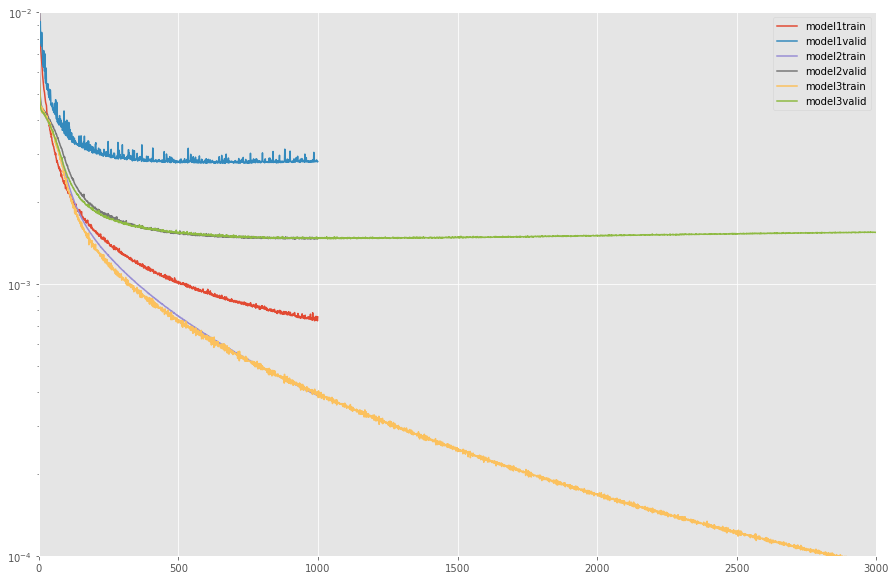

In [31]:
pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
    pd.DataFrame(hist3.history).rename(columns={
        'loss':'model3train',
        'val_loss':'model3valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

# 学習係数の変更
- 収束を早めるパラメータを調整する
- 学習係数が大きい...学習は早く進むがエラーが大きいところで学習が止まってしまう
- 学習係数が小さい...最終的にはエラーが小さくなるが学習に時間がかかる
- 直感的に、「はじめは大きな学習係数で、徐々に学習係数を小さくする」ようにすれば効率よく学習できると考えられる

In [32]:
"""decayというパラメータをいじることで非線形に学習係数を小さくすることができる
"""

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [33]:
from keras.callbacks import LearningRateScheduler

start = 0.03
stop = 0.001
epochs = 1000
learning_rates = np.linspace(start, stop, epochs)

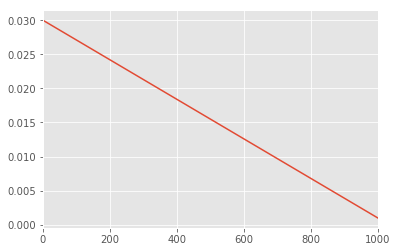

In [34]:
"""学習率を線形に下げる式
"""
pd.Series(learning_rates).plot()

In [35]:
"""model4
model3に学習係数の調整を加えたモデル
"""

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (2, 2)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (2, 2)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(500))
model4.add(Activation('relu'))
model4.add(Dense(500))
model4.add(Activation('relu'))
model4.add(Dense(30))

model4.summary()

"""以下２つだけがmodel3と異なる
"""
change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))
sgd = SGD(lr=start, momentum=0.9, nesterov=True)

model4.compile(loss='mean_squared_error', optimizer=sgd)
flipgen = FlippedImageDataGenerator()

hist4 = model4.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             epochs=epochs,
                             validation_data=(X_val, y_val),
                             callbacks=[change_lr])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_27 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        8256      
_________________________________________________________________
activation_28 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 128)       32896     
__________

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=53, epochs=1000, callbacks=[<keras.ca...)`


Epoch 1/1000
53/53 [==============================] - 2s - loss: 0.0217 - val_loss: 0.0053
Epoch 2/1000
53/53 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0047
Epoch 3/1000
53/53 [==============================] - 1s - loss: 0.0047 - val_loss: 0.0045
Epoch 4/1000
53/53 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0044
Epoch 5/1000
53/53 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0044
Epoch 6/1000
53/53 [==============================] - 1s - loss: 0.0044 - val_loss: 0.0043
Epoch 7/1000
53/53 [==============================] - 1s - loss: 0.0043 - val_loss: 0.0043
Epoch 8/1000
53/53 [==============================] - 1s - loss: 0.0043 - val_loss: 0.0042
Epoch 9/1000
53/53 [==============================] - 1s - loss: 0.0043 - val_loss: 0.0042
Epoch 10/1000
53/53 [==============================] - 1s - loss: 0.0043 - val_loss: 0.0042
Epoch 11/1000
53/53 [==============================] - 1s - loss: 0.0042 - val_loss: 0.00

53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 91/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 92/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 93/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 94/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 95/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0018
Epoch 96/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0017
Epoch 97/1000
53/53 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0017
Epoch 98/1000
53/53 [==============================] - 1s - loss: 0.0012 - val_loss: 0.0017
Epoch 99/1000
53/53 [==============================] - 1s - loss: 0.0012 - val_loss: 0.0017
Epoch 100/1000
53/53 [==============================] - 1s - loss: 0.0012 - val_loss: 0.0017
E

53/53 [==============================] - 1s - loss: 8.3623e-04 - val_loss: 0.0016
Epoch 177/1000
53/53 [==============================] - 1s - loss: 8.2598e-04 - val_loss: 0.0015
Epoch 178/1000
53/53 [==============================] - 1s - loss: 8.3060e-04 - val_loss: 0.0016
Epoch 179/1000
53/53 [==============================] - 1s - loss: 8.1484e-04 - val_loss: 0.0015
Epoch 180/1000
53/53 [==============================] - 1s - loss: 8.2841e-04 - val_loss: 0.0015
Epoch 181/1000
53/53 [==============================] - 1s - loss: 8.2938e-04 - val_loss: 0.0015
Epoch 182/1000
53/53 [==============================] - 1s - loss: 8.1875e-04 - val_loss: 0.0015
Epoch 183/1000
53/53 [==============================] - 1s - loss: 8.0409e-04 - val_loss: 0.0015
Epoch 184/1000
53/53 [==============================] - 1s - loss: 8.1351e-04 - val_loss: 0.0016
Epoch 185/1000
53/53 [==============================] - 1s - loss: 7.9805e-04 - val_loss: 0.0015
Epoch 186/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 6.2539e-04 - val_loss: 0.0015
Epoch 261/1000
53/53 [==============================] - 1s - loss: 6.3686e-04 - val_loss: 0.0015
Epoch 262/1000
53/53 [==============================] - 1s - loss: 6.1980e-04 - val_loss: 0.0015
Epoch 263/1000
53/53 [==============================] - 1s - loss: 6.1936e-04 - val_loss: 0.0015
Epoch 264/1000
53/53 [==============================] - 1s - loss: 6.3191e-04 - val_loss: 0.0015
Epoch 265/1000
53/53 [==============================] - 1s - loss: 6.2199e-04 - val_loss: 0.0015
Epoch 266/1000
53/53 [==============================] - 1s - loss: 6.1801e-04 - val_loss: 0.0015
Epoch 267/1000
53/53 [==============================] - 1s - loss: 6.2030e-04 - val_loss: 0.0015
Epoch 268/1000
53/53 [==============================] - 1s - loss: 6.1932e-04 - val_loss: 0.0015
Epoch 269/1000
53/53 [==============================] - 1s - loss: 6.1716e-04 - val_loss: 0.0015
Epoch 270/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 5.1568e-04 - val_loss: 0.0015
Epoch 345/1000
53/53 [==============================] - 1s - loss: 5.0681e-04 - val_loss: 0.0015
Epoch 346/1000
53/53 [==============================] - 1s - loss: 5.1094e-04 - val_loss: 0.0015
Epoch 347/1000
53/53 [==============================] - 1s - loss: 4.9716e-04 - val_loss: 0.0015
Epoch 348/1000
53/53 [==============================] - 1s - loss: 5.0743e-04 - val_loss: 0.0015
Epoch 349/1000
53/53 [==============================] - 1s - loss: 4.8921e-04 - val_loss: 0.0015
Epoch 350/1000
53/53 [==============================] - 1s - loss: 5.0624e-04 - val_loss: 0.0015
Epoch 351/1000
53/53 [==============================] - 1s - loss: 4.9724e-04 - val_loss: 0.0015
Epoch 352/1000
53/53 [==============================] - 1s - loss: 4.9926e-04 - val_loss: 0.0015
Epoch 353/1000
53/53 [==============================] - 1s - loss: 5.0434e-04 - val_loss: 0.0015
Epoch 354/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 4.2822e-04 - val_loss: 0.0015
Epoch 429/1000
53/53 [==============================] - 1s - loss: 4.2469e-04 - val_loss: 0.0015
Epoch 430/1000
53/53 [==============================] - 1s - loss: 4.2307e-04 - val_loss: 0.0015
Epoch 431/1000
53/53 [==============================] - 1s - loss: 4.2109e-04 - val_loss: 0.0015
Epoch 432/1000
53/53 [==============================] - 2s - loss: 4.2071e-04 - val_loss: 0.0015
Epoch 433/1000
53/53 [==============================] - 1s - loss: 4.2187e-04 - val_loss: 0.0015
Epoch 434/1000
53/53 [==============================] - 1s - loss: 4.1926e-04 - val_loss: 0.0015
Epoch 435/1000
53/53 [==============================] - 1s - loss: 4.1922e-04 - val_loss: 0.0015
Epoch 436/1000
53/53 [==============================] - 1s - loss: 4.1406e-04 - val_loss: 0.0015
Epoch 437/1000
53/53 [==============================] - 1s - loss: 4.2041e-04 - val_loss: 0.0014
Epoch 438/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 3.6916e-04 - val_loss: 0.0014
Epoch 513/1000
53/53 [==============================] - 1s - loss: 3.7074e-04 - val_loss: 0.0015
Epoch 514/1000
53/53 [==============================] - 1s - loss: 3.6000e-04 - val_loss: 0.0014
Epoch 515/1000
53/53 [==============================] - 1s - loss: 3.7101e-04 - val_loss: 0.0015
Epoch 516/1000
53/53 [==============================] - 1s - loss: 3.6294e-04 - val_loss: 0.0015
Epoch 517/1000
53/53 [==============================] - 1s - loss: 3.6782e-04 - val_loss: 0.0015
Epoch 518/1000
53/53 [==============================] - 1s - loss: 3.7057e-04 - val_loss: 0.0015
Epoch 519/1000
53/53 [==============================] - 1s - loss: 3.5225e-04 - val_loss: 0.0015
Epoch 520/1000
53/53 [==============================] - 1s - loss: 3.7245e-04 - val_loss: 0.0014
Epoch 521/1000
53/53 [==============================] - 1s - loss: 3.6279e-04 - val_loss: 0.0015
Epoch 522/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 3.3088e-04 - val_loss: 0.0015
Epoch 597/1000
53/53 [==============================] - 1s - loss: 3.2758e-04 - val_loss: 0.0015
Epoch 598/1000
53/53 [==============================] - 1s - loss: 3.2417e-04 - val_loss: 0.0015
Epoch 599/1000
53/53 [==============================] - 1s - loss: 3.2857e-04 - val_loss: 0.0015
Epoch 600/1000
53/53 [==============================] - 1s - loss: 3.2951e-04 - val_loss: 0.0014
Epoch 601/1000
53/53 [==============================] - 1s - loss: 3.2215e-04 - val_loss: 0.0015
Epoch 602/1000
53/53 [==============================] - 1s - loss: 3.2760e-04 - val_loss: 0.0015
Epoch 603/1000
53/53 [==============================] - 1s - loss: 3.2904e-04 - val_loss: 0.0015
Epoch 604/1000
53/53 [==============================] - 1s - loss: 3.2372e-04 - val_loss: 0.0015
Epoch 605/1000
53/53 [==============================] - 1s - loss: 3.2236e-04 - val_loss: 0.0015
Epoch 606/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 2.9921e-04 - val_loss: 0.0015
Epoch 681/1000
53/53 [==============================] - 1s - loss: 2.9635e-04 - val_loss: 0.0015
Epoch 682/1000
53/53 [==============================] - 1s - loss: 3.0127e-04 - val_loss: 0.0015
Epoch 683/1000
53/53 [==============================] - 1s - loss: 3.0268e-04 - val_loss: 0.0015
Epoch 684/1000
53/53 [==============================] - 1s - loss: 2.9418e-04 - val_loss: 0.0015
Epoch 685/1000
53/53 [==============================] - 1s - loss: 3.0373e-04 - val_loss: 0.0015
Epoch 686/1000
53/53 [==============================] - 1s - loss: 2.9420e-04 - val_loss: 0.0015
Epoch 687/1000
53/53 [==============================] - 1s - loss: 2.9722e-04 - val_loss: 0.0015
Epoch 688/1000
53/53 [==============================] - 1s - loss: 2.9810e-04 - val_loss: 0.0015
Epoch 689/1000
53/53 [==============================] - 1s - loss: 2.9207e-04 - val_loss: 0.0015
Epoch 690/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 2.7728e-04 - val_loss: 0.0015
Epoch 765/1000
53/53 [==============================] - 1s - loss: 2.7650e-04 - val_loss: 0.0015
Epoch 766/1000
53/53 [==============================] - 1s - loss: 2.7919e-04 - val_loss: 0.0015
Epoch 767/1000
53/53 [==============================] - 1s - loss: 2.7728e-04 - val_loss: 0.0015
Epoch 768/1000
53/53 [==============================] - 1s - loss: 2.7685e-04 - val_loss: 0.0015
Epoch 769/1000
53/53 [==============================] - 1s - loss: 2.7491e-04 - val_loss: 0.0015
Epoch 770/1000
53/53 [==============================] - 1s - loss: 2.8122e-04 - val_loss: 0.0015
Epoch 771/1000
53/53 [==============================] - 1s - loss: 2.8037e-04 - val_loss: 0.0015
Epoch 772/1000
53/53 [==============================] - 1s - loss: 2.7420e-04 - val_loss: 0.0015
Epoch 773/1000
53/53 [==============================] - 1s - loss: 2.7369e-04 - val_loss: 0.0015
Epoch 774/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 2.6301e-04 - val_loss: 0.0015
Epoch 849/1000
53/53 [==============================] - 1s - loss: 2.6623e-04 - val_loss: 0.0015
Epoch 850/1000
53/53 [==============================] - 1s - loss: 2.6190e-04 - val_loss: 0.0015
Epoch 851/1000
53/53 [==============================] - 1s - loss: 2.6098e-04 - val_loss: 0.0015
Epoch 852/1000
53/53 [==============================] - 1s - loss: 2.6463e-04 - val_loss: 0.0015
Epoch 853/1000
53/53 [==============================] - 1s - loss: 2.6525e-04 - val_loss: 0.0015
Epoch 854/1000
53/53 [==============================] - 1s - loss: 2.6153e-04 - val_loss: 0.0015
Epoch 855/1000
53/53 [==============================] - 1s - loss: 2.6852e-04 - val_loss: 0.0015
Epoch 856/1000
53/53 [==============================] - 1s - loss: 2.6052e-04 - val_loss: 0.0015
Epoch 857/1000
53/53 [==============================] - 1s - loss: 2.6135e-04 - val_loss: 0.0015
Epoch 858/1000
53/53 [=======================

53/53 [==============================] - 1s - loss: 2.5941e-04 - val_loss: 0.0015
Epoch 933/1000
53/53 [==============================] - 1s - loss: 2.5634e-04 - val_loss: 0.0015
Epoch 934/1000
53/53 [==============================] - 1s - loss: 2.5154e-04 - val_loss: 0.0015
Epoch 935/1000
53/53 [==============================] - 1s - loss: 2.5929e-04 - val_loss: 0.0015
Epoch 936/1000
53/53 [==============================] - 1s - loss: 2.5345e-04 - val_loss: 0.0015
Epoch 937/1000
53/53 [==============================] - 1s - loss: 2.5477e-04 - val_loss: 0.0015
Epoch 938/1000
53/53 [==============================] - 1s - loss: 2.5643e-04 - val_loss: 0.0015
Epoch 939/1000
53/53 [==============================] - 1s - loss: 2.5265e-04 - val_loss: 0.0015
Epoch 940/1000
53/53 [==============================] - 1s - loss: 2.5898e-04 - val_loss: 0.0015
Epoch 941/1000
53/53 [==============================] - 1s - loss: 2.4842e-04 - val_loss: 0.0015
Epoch 942/1000
53/53 [=======================

In [36]:
"""モデルの保存
"""

model_dir = './models/'
!mkdir -p $model_dir

open('{}/model4_architecture.json'.format(model_dir), 'w').write(model4.to_json())
model4.save_weights('{}/model4_weights.h5'.format(model_dir))

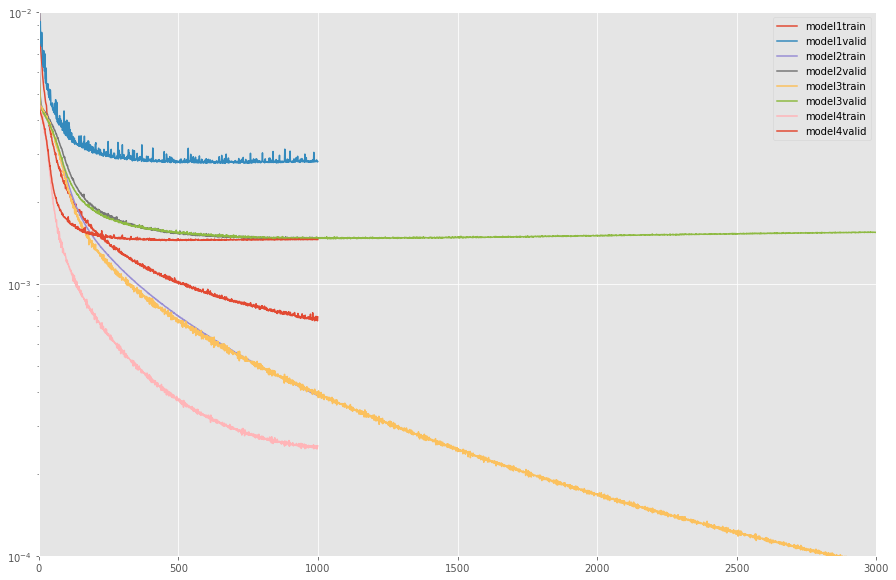

In [37]:
pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
    pd.DataFrame(hist3.history).rename(columns={
        'loss':'model3train',
        'val_loss':'model3valid',
    }),
    pd.DataFrame(hist4.history).rename(columns={
        'loss':'model4train',
        'val_loss':'model4valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

# ドロップアウト
- 過学習を防ぐ方法
- 一定確率でランダムにニューロンを無視して学習を進めることでモデルの汎用性があがる

In [38]:
from keras.layers import Dropout

start = 0.03
stop = 0.001
epochs = 1000

X, y = load2d()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

model5 = Sequential()

model5.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.1))

model5.add(Conv2D(64, (2, 2)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(128, (2, 2)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

model5.add(Flatten())
model5.add(Dense(500))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(500))
model5.add(Activation('relu'))
model5.add(Dense(30))

model5.summary()

change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))
sgd = SGD(lr=start, momentum=0.9, nesterov=True)
model5.compile(loss='mean_squared_error', optimizer=sgd)
flipgen = FlippedImageDataGenerator()

hist5 = model5.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             epochs=epochs,
                             validation_data=(X_val, y_val),
                             callbacks=[change_lr])

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=53, epochs=1000, callbacks=[<keras.ca...)`


Epoch 1/1000
53/53 [==============================] - 2s - loss: 0.0292 - val_loss: 0.0139
Epoch 2/1000
53/53 [==============================] - 2s - loss: 0.0075 - val_loss: 0.0074
Epoch 3/1000
53/53 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0067
Epoch 4/1000
53/53 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0057
Epoch 5/1000
53/53 [==============================] - 2s - loss: 0.0056 - val_loss: 0.0070
Epoch 6/1000
53/53 [==============================] - 2s - loss: 0.0053 - val_loss: 0.0058
Epoch 7/1000
53/53 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0053
Epoch 8/1000
53/53 [==============================] - 2s - loss: 0.0049 - val_loss: 0.0053
Epoch 9/1000
53/53 [==============================] - 2s - loss: 0.0050 - val_loss: 0.0054
Epoch 10/1000
53/53 [==============================] - 2s - loss: 0.0049 - val_loss: 0.0056
Epoch 11/1000
53/53 [==============================] - 2s - loss: 0.0048 - val_loss: 0.00

53/53 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0034
Epoch 91/1000
53/53 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0033
Epoch 92/1000
53/53 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0033
Epoch 93/1000
53/53 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0033
Epoch 94/1000
53/53 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0033
Epoch 95/1000
53/53 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0032
Epoch 96/1000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0032
Epoch 97/1000
53/53 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0032
Epoch 98/1000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0032
Epoch 99/1000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0031
Epoch 100/1000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0031
E

53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 179/1000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0022
Epoch 180/1000
53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 181/1000
53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 182/1000
53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 183/1000
53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 184/1000
53/53 [==============================] - 2s - loss: 0.0023 - val_loss: 0.0022
Epoch 185/1000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0022
Epoch 186/1000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0022
Epoch 187/1000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0022
Epoch 188/1000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss:

53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0019
Epoch 267/1000
53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0019
Epoch 268/1000
53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0019
Epoch 269/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0019
Epoch 270/1000
53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0020
Epoch 271/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0019
Epoch 272/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0020
Epoch 273/1000
53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0019
Epoch 274/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0019
Epoch 275/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0019
Epoch 276/1000
53/53 [==============================] - 2s - loss: 0.0019 - val_loss:

53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 355/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 356/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 357/1000
53/53 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0018
Epoch 358/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 359/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 360/1000
53/53 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0018
Epoch 361/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 362/1000
53/53 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0018
Epoch 363/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 364/1000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss:

53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 443/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 444/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 445/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 446/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 447/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 448/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 449/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 450/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 451/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0017
Epoch 452/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss:

53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 531/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 532/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 533/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 534/1000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 535/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 536/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 537/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 538/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 539/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0016
Epoch 540/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss:

53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 619/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 620/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 621/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 622/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 623/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 624/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 625/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 626/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 627/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 628/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss:

53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 707/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 708/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 709/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 710/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 711/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 712/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 713/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 714/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 715/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 716/1000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss:

53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 795/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 796/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 797/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 798/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 799/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 800/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 801/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 802/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 803/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 804/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss:

53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 883/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 884/1000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0015
Epoch 885/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 886/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 887/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 888/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 889/1000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0015
Epoch 890/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 891/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 892/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss:

53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0015
Epoch 971/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 972/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 973/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 974/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 975/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 976/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 977/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 978/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 979/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 980/1000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss:

In [39]:
"""モデルの保存
"""

model_dir = './models/'
!mkdir -p $model_dir

open('{}/model5_architecture.json'.format(model_dir), 'w').write(model5.to_json())
model5.save_weights('{}/model5_weights.h5'.format(model_dir))

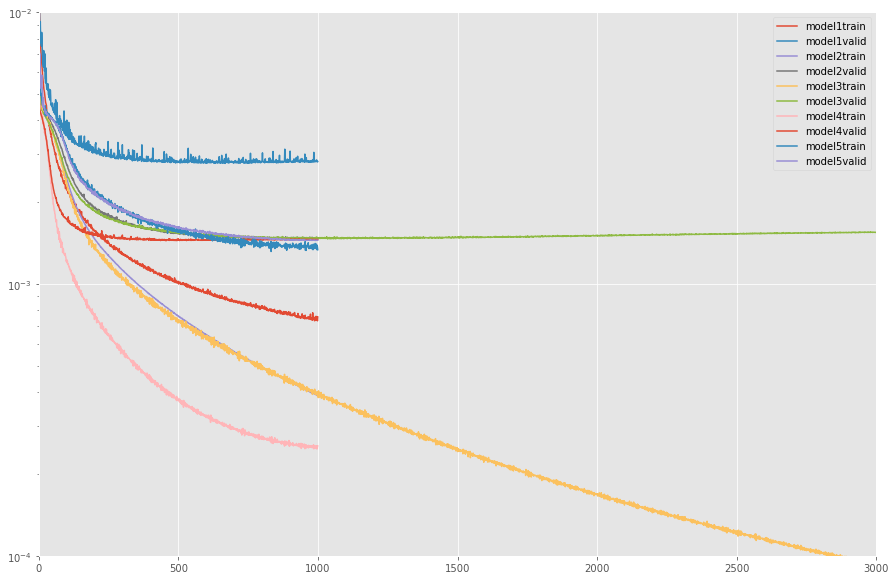

In [40]:
pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
    pd.DataFrame(hist3.history).rename(columns={
        'loss':'model3train',
        'val_loss':'model3valid',
    }),
    pd.DataFrame(hist4.history).rename(columns={
        'loss':'model4train',
        'val_loss':'model4valid',
    }),
    pd.DataFrame(hist5.history).rename(columns={
        'loss':'model5train',
        'val_loss':'model5valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

In [41]:
"""Dropoutの効果測定
訓練誤差とvalidation errorの値の乖離が少なければDropoutによって過学習が防げている状態といえる
"""

from sklearn.metrics import mean_squared_error
# 訓練誤差を出力
print('mean squared error', mean_squared_error(model5.predict(X), y))

mean squared error 0.00109297


In [42]:
"""Dropoutにより過学習を防げるようになったので更にニューロンを増やしてみる
"""

from keras.layers import Dropout

start = 0.03
stop = 0.001
epochs = 5000

X, y = load2d()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

model6 = Sequential()

model6.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.1))

model6.add(Conv2D(64, (2, 2)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(128, (2, 2)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.3))

model6.add(Flatten())
model6.add(Dense(1000))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1000))
model6.add(Activation('relu'))
model6.add(Dense(30))

model6.summary()

change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))
sgd = SGD(lr=start, momentum=0.9, nesterov=True)
model6.compile(loss='mean_squared_error', optimizer=sgd)
flipgen = FlippedImageDataGenerator()

hist6 = model6.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             epochs=epochs,
                             validation_data=(X_val, y_val),
                             callbacks=[change_lr])

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=53, epochs=5000, callbacks=[<keras.ca...)`


Epoch 1/5000
53/53 [==============================] - 2s - loss: 0.0236 - val_loss: 0.0120
Epoch 2/5000
53/53 [==============================] - 2s - loss: 0.0068 - val_loss: 0.0108
Epoch 3/5000
53/53 [==============================] - 2s - loss: 0.0061 - val_loss: 0.0084
Epoch 4/5000
53/53 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0075
Epoch 5/5000
53/53 [==============================] - 2s - loss: 0.0056 - val_loss: 0.0077
Epoch 6/5000
53/53 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0076
Epoch 7/5000
53/53 [==============================] - 2s - loss: 0.0053 - val_loss: 0.0068
Epoch 8/5000
53/53 [==============================] - 2s - loss: 0.0051 - val_loss: 0.0065
Epoch 9/5000
53/53 [==============================] - 2s - loss: 0.0051 - val_loss: 0.0062
Epoch 10/5000
53/53 [==============================] - 2s - loss: 0.0050 - val_loss: 0.0064
Epoch 11/5000
53/53 [==============================] - 2s - loss: 0.0049 - val_loss: 0.00

53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0032
Epoch 91/5000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0032
Epoch 92/5000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0031
Epoch 93/5000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0031
Epoch 94/5000
53/53 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0031
Epoch 95/5000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0030
Epoch 96/5000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0030
Epoch 97/5000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0030
Epoch 98/5000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0030
Epoch 99/5000
53/53 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0029
Epoch 100/5000
53/53 [==============================] - 2s - loss: 0.0030 - val_loss: 0.0029
E

53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0021
Epoch 179/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0021
Epoch 180/5000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss: 0.0020
Epoch 181/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 182/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 183/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 184/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 185/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 186/5000
53/53 [==============================] - 2s - loss: 0.0021 - val_loss: 0.0020
Epoch 187/5000
53/53 [==============================] - 2s - loss: 0.0020 - val_loss: 0.0020
Epoch 188/5000
53/53 [==============================] - 2s - loss: 0.0022 - val_loss:

53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 267/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 268/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 269/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 270/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 271/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0017
Epoch 272/5000
53/53 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0017
Epoch 273/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0017
Epoch 274/5000
53/53 [==============================] - 2s - loss: 0.0017 - val_loss: 0.0018
Epoch 275/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss: 0.0018
Epoch 276/5000
53/53 [==============================] - 2s - loss: 0.0018 - val_loss:

53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 355/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 356/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 357/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 358/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 359/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 360/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 361/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 362/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 363/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss: 0.0016
Epoch 364/5000
53/53 [==============================] - 2s - loss: 0.0016 - val_loss:

53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 443/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 444/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 445/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 446/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 447/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 448/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 449/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 450/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 451/5000
53/53 [==============================] - 2s - loss: 0.0015 - val_loss: 0.0015
Epoch 452/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss:

53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 531/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 532/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 533/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 534/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 535/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 536/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 537/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 538/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 539/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0015
Epoch 540/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss:

53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 619/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 620/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 621/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 622/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 623/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 624/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 625/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 626/5000
53/53 [==============================] - 2s - loss: 0.0014 - val_loss: 0.0014
Epoch 627/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 628/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss:

53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 707/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 708/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 709/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 710/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 711/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 712/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 713/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 714/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 715/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 716/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss:

53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 795/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 796/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 797/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 798/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 799/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 800/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 801/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 802/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 803/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 804/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss:

53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 883/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 884/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 885/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 886/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 887/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 888/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 889/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 890/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 891/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 892/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss:

53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 971/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 972/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 973/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 974/5000
53/53 [==============================] - 2s - loss: 0.0013 - val_loss: 0.0014
Epoch 975/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 976/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 977/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 978/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 979/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss: 0.0014
Epoch 980/5000
53/53 [==============================] - 2s - loss: 0.0012 - val_loss:

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [ ]:
"""モデルの保存
"""
open('{}/model6_architecture.json'.format(model_dir), 'w').write(model6.to_json())
model6.save_weights('{}/model6_weights.h5'.format(model_dir))

In [ ]:
pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
    pd.DataFrame(hist3.history).rename(columns={
        'loss':'model3train',
        'val_loss':'model3valid',
    }),
    pd.DataFrame(hist4.history).rename(columns={
        'loss':'model4train',
        'val_loss':'model4valid',
    }),
    pd.DataFrame(hist5.history).rename(columns={
        'loss':'model5train',
        'val_loss':'model5valid',
    }),
    pd.DataFrame(hist6.history).rename(columns={
        'loss':'model6train',
        'val_loss':'model6valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

# Early Stopping
- 過学習が進むとvalidation errorが減少から増加に転じるポイントがある
- 学習時のvalidation errorが最小になったところで学習をストップさせること

In [ ]:
from keras.layers import Dropout
from keras.callbackslbacks import EarlyStopping

start = 0.03
stop = 0.001
epochs = 1000

model7 = Sequential()

model7.add(Conv2D(32, (3, 3), input_shape=(96, 96, 1)))
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.1))

model7.add(Conv2D(64, (2, 2)))
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.2))

model7.add(Conv2D(128, (2, 2)))
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.3))

model7.add(Flatten())
model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))
model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dense(30))

model7.summary()

change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))
sgd = SGD(lr=start, momentum=0.9, nesterov=True)
model7.compile(loss='mean_squared_error', optimizer=sgd)
flipgen = FlippedImageDataGenerator()

hist7 = model7.fit_generator(flipgen.flow(X_train, y_train),
                             samples_per_epoch=X_train.shape[0],
                             epochs=epochs,
                             validation_data=(X_val, y_val),
                             callbacks=[change_lr])

In [ ]:
"""モデルの保存
"""

open('{}/model7_architecture.json'.format(model_dir), 'w').write(model7.to_json())
model7.save_weights('{}/model7_weights.h5'.format(model_dir))

In [ ]:
pd.concat([
    pd.DataFrame(hist.history).rename(columns={
        'loss':'model1train',
        'val_loss':'model1valid',
    }),
    pd.DataFrame(hist2.history).rename(columns={
        'loss':'model2train',
        'val_loss':'model2valid',
    }),
    pd.DataFrame(hist3.history).rename(columns={
        'loss':'model3train',
        'val_loss':'model3valid',
    }),
    pd.DataFrame(hist4.history).rename(columns={
        'loss':'model4train',
        'val_loss':'model4valid',
    }),
    pd.DataFrame(hist5.history).rename(columns={
        'loss':'model5train',
        'val_loss':'model5valid',
    }),
    pd.DataFrame(hist6.history).rename(columns={
        'loss':'model6train',
        'val_loss':'model6valid',
    }),
    pd.DataFrame(hist7.history).rename(columns={
        'loss':'model7train',
        'val_loss':'model7valid',
    }),
], axis=1).plot(ylim=(1e-4, 1e-2), figsize=(15,10), logy=True)

# モデルの特化
- keypoints全部でkeypointsを予測するのではなく、近いkeypointsだけのグループにまとめて、モデルを分けることで特化モデルのアンサンブルモデルとするやり方

# 転移学習
- 学習済みの重みを初期値に使うことで学習時間を短縮し、神が作った結果を転用して精度を上げる方法